# Final Project Submission

Please fill out:
* Student name: Gabriel Araujo
* Student pace: part time
* Scheduled project: August 15th, 2:30 
* Instructor name: James Irving
* Blog post URL: https://learn.co/blog/blog_posts/38434/edit

# INTRODUCTION

I have been tasked with investigating house sales in the King County area and building a model to suggest home improvements in order to increase house value.

The following questions will be answered in this project:

1- Which feature generates the best model, zip codes or sub regions?

2 - Which house attributes have a high impact in sale price and which attributes have the least/negative impact?

3 - Does transforming the target value improve model efficiency?


**DATA**

Column Names and descriptions for Kings County Data Set:

* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** - is prediction target
* **bedroomsNumber** - of Bedrooms/House
* **bathroomsNumber** - of bathrooms/bedrooms
* **sqft_livingsquare** - footage of the home
* **sqft_lotsquare** - footage of the lot
* **floorsTotal** - floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

**KING COUNTY GRADING SYSTEM**

Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

* **1-3** - Falls short of minimum building standards. Normally cabin or inferior structure.

* **4** - Generally older, low quality construction. Does not meet code.

* **5** - Low construction costs and workmanship. Small, simple design.

* **6** - Lowest grade currently meeting building code. Low quality materials and simple designs.

* **7** - Average grade of construction and design. Commonly seen in plats and older sub-divisions.

* **8** - Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

* **9** - Better architectural design with extra interior and exterior design and quality.

* **10** - Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

* **11** - Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

* **12** - Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

* **13** - Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

# OBTAIN

In [2]:
#IMPORTING
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [3]:
#OPENING DATASET 
pd.set_option('display.max_columns',0)
df = pd.read_csv('kc_house_data.csv')
df.drop(columns = 'id',inplace = True)
df

date     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0      10/13/2014  221900.0         3  ... -122.257           1340        5650
1       12/9/2014  538000.0         3  ... -122.319           1690        7639
2       2/25/2015  180000.0         2  ... -122.233           2720        8062
3       12/9/2014  604000.0         4  ... -122.393           1360        5000
4       2/18/2015  510000.0         3  ... -122.045           1800        7503
...           ...       ...       ...  ...      ...            ...         ...
21592   5/21/2014  360000.0         3  ... -122.346           1530        1509
21593   2/23/2015  400000.0         4  ... -122.362           1830        7200
21594   6/23/2014  402101.0         2  ... -122.299           1020        2007
21595   1/16/2015  400000.0         3  ... -122.069           1410        1287
21596  10/15/2014  325000.0         2  ... -122.299           1020        1357

[21597 rows x 20 columns]

In [4]:
#GETTING DATA INFO
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10), object(2)
memory usage: 3.3+ MB


In [5]:
#GETTING DATA BASIC STATS
df.describe()

price      bedrooms  ...  sqft_living15     sqft_lot15
count  2.159700e+04  21597.000000  ...   21597.000000   21597.000000
mean   5.402966e+05      3.373200  ...    1986.620318   12758.283512
std    3.673681e+05      0.926299  ...     685.230472   27274.441950
min    7.800000e+04      1.000000  ...     399.000000     651.000000
25%    3.220000e+05      3.000000  ...    1490.000000    5100.000000
50%    4.500000e+05      3.000000  ...    1840.000000    7620.000000
75%    6.450000e+05      4.000000  ...    2360.000000   10083.000000
max    7.700000e+06     33.000000  ...    6210.000000  871200.000000

[8 rows x 18 columns]

In [6]:
#LOOKING AT NULL VALUES
df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

# SCRUB (DATA CLEANING)

Since some data is missing, steps will be taken in order to fill/remove rows with missing data. Also, column data types will be changed in order to better analyze the data.

In [8]:
#WANT TO FILL ALL NULL VALUES IN WATERFRONT WITH DISTRIBUTION OF 146:19075
s = df.waterfront.value_counts(normalize = True)
print(s)

#FILLING COLUMN WITH DESIRED DISTRIBUTION
waterfront_null = df.waterfront.isnull()
df.loc[waterfront_null,'waterfront'] = np.random.choice(s.index,size=len(df[waterfront_null]),p=s.values)
print(df.waterfront.value_counts())

0.0    0.992404
1.0    0.007596
Name: waterfront, dtype: float64
0.0    21430
1.0      167
Name: waterfront, dtype: int64


In [9]:
#CONVERTING DATE FROM OBJECT TO DATE
df.date = pd.to_datetime(df.date)

In [10]:
df[df.sqft_basement == '?']

date      price  bedrooms  ...     long  sqft_living15  sqft_lot15
6     2014-06-27   257500.0         3  ... -122.327           2238        6819
18    2014-12-05   189000.0         2  ... -122.210           1060        5095
42    2014-07-07   861990.0         5  ... -122.016           3625        5639
79    2015-03-23   720000.0         4  ... -122.025           3350       39750
112   2014-09-16   272500.0         3  ... -122.031           1540       11656
...          ...        ...       ...  ...      ...            ...         ...
21442 2014-07-11   504600.0         5  ... -122.330           2180        5009
21447 2014-07-21   337500.0         4  ... -122.081           2300        3836
21473 2015-01-20   352500.0         2  ... -122.387            980        1023
21519 2014-10-15   332000.0         4  ... -122.356           2380        5396
21581 2015-04-21  1580000.0         4  ... -122.223           2290       10125

[454 rows x 20 columns]

In [11]:
# q = df.sqft_basement == '?'
# df[q].loc[df['sqft_basement']!= df['sqft_above']] = df[q].sqft_living - df[q].sqft_above

In [12]:
#SEEING IF HOUSES WITH '?' FOR SQFT_BASEMENT ACTUALLY HAVE A BASEMENT AND FILLING MISSING VALUES
for index, value in enumerate(df.sqft_basement):
    if value == '?':
        if df.sqft_living[index] != df.sqft_above[index]:
            df.sqft_basement[index] = df.sqft_living[index] - df.sqft_above[index]
        elif df.sqft_living[index] == df.sqft_above[index]:
            df.sqft_basement[index] = 0

C:\Users\Biel_\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Biel_\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [13]:
#REPLACING ALL NULL VALUES IN YR_RENOVATED TO 0 BECAUSE MAJORITY IS 0
df['yr_renovated'].fillna(0,inplace = True)

In [14]:
# #REPLACING ALL NULL VALUES IN YR_RENOVATED TO 0 BECAUSE MAJORITY IS 0
# for index, col in enumerate(df.yr_renovated.isnull()):
#     if col == True:
#         df.yr_renovated[index] = 0
# df

In [15]:
#TURNING VALUES FROM FLOAT TO INT
float_list = ['sqft_basement','waterfront','yr_renovated','sqft_basement']
for col in float_list:
    df[col] = pd.to_numeric(df[col]).astype(int)#.round(0)

In [16]:
df['bathrooms'] = df['bathrooms'].map(lambda x: int(round(x,0)))

In [17]:
#CREATING YEAR SOLD AND RENOVATED_POST_1990 COLUMNS
#RENOVATED_POST_1990 IS BEING CREATED BECAUSE OF THE ASSUMPTION THAT IF THE RENOVATION IS TOO OLD, 
#IT WILL LOSE ITS VALUE
df['year_sold'] = pd.DatetimeIndex(df['date']).year
df['renovated_post_1990'] = 0

In [18]:
#REPLACING 2015 YEAR RENOVATED AND YEAR BUILT WITH 2014 BECAUSE HOUSE WAS SOLD IN 2014
for i, yr in enumerate(df['year_sold']):
    if yr < df['yr_renovated'][i]:
        df['yr_renovated'][i] = yr
    elif yr < df['yr_built'][i]:
        df['yr_built'][i] = yr


C:\Users\Biel_\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Biel_\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [19]:
#CREATING HOUSE AGE WHEN SOLD COLUMNS AND FILLING IN RENOVATED_POST-1990 COLUMN
df['house_age_when_sold'] = df['date'].dt.year - df['yr_built'] 
for index, yr in enumerate(df['yr_renovated']):
    if yr >= 1990:
        df['renovated_post_1990'][index] = 1
    else:
        df['renovated_post_1990'][index] = 0
df['renovated_post_1990'].value_counts()

C:\Users\Biel_\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Biel_\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


0    21075
1      522
Name: renovated_post_1990, dtype: int64

In [20]:
#ZIPCODE TO SUB_REGION DF
subregion_df = pd.read_excel('SubRegZipCityNeighborhood.xlsx')
subregion_df

zipcode   Sub_Region
0      98001  South_Urban
1      98002  South_Urban
2      98003  South_Urban
3      98004   East_Urban
4      98005   East_Urban
..       ...          ...
116    98199      Seattle
117    98224   East_Rural
118    98251   East_Rural
119    98288   East_Rural
120    98354  South_Urban

[121 rows x 2 columns]

In [21]:
#JOINING SUBREGIONS WITH ZIPCODE
df = df.join(subregion_df.set_index('zipcode'),on = 'zipcode')
df

date     price  ...  house_age_when_sold         Sub_Region
0     2014-10-13  221900.0  ...                   59        South_Urban
1     2014-12-09  538000.0  ...                   63            Seattle
2     2015-02-25  180000.0  ...                   82              North
3     2014-12-09  604000.0  ...                   49            Seattle
4     2015-02-18  510000.0  ...                   28         East_Urban
...          ...       ...  ...                  ...                ...
21592 2014-05-21  360000.0  ...                    5            Seattle
21593 2015-02-23  400000.0  ...                    1  South_and_Seattle
21594 2014-06-23  402101.0  ...                    5            Seattle
21595 2015-01-16  400000.0  ...                   11         East_Urban
21596 2014-10-15  325000.0  ...                    6            Seattle

[21597 rows x 24 columns]

In [22]:
#CHECKING SUBREGION VALUE COUNTS
df['Sub_Region'].value_counts()

Seattle              6233
East_Urban           5694
South_Urban          5278
North                1197
South_Rural           922
East_Rural            922
North_and_Seattle     748
South_and_Seattle     288
West                  198
Vashon_Island         117
Name: Sub_Region, dtype: int64

In [23]:
#DROPPING VIEW COLUMN
df.drop('view',axis = 1,inplace =  True)

In [24]:
#DATAFRAME INFO AFTER REMOVING NULL VALUES
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
date                   21597 non-null datetime64[ns]
price                  21597 non-null float64
bedrooms               21597 non-null int64
bathrooms              21597 non-null int64
sqft_living            21597 non-null int64
sqft_lot               21597 non-null int64
floors                 21597 non-null float64
waterfront             21597 non-null int32
condition              21597 non-null int64
grade                  21597 non-null int64
sqft_above             21597 non-null int64
sqft_basement          21597 non-null int32
yr_built               21597 non-null int64
yr_renovated           21597 non-null int32
zipcode                21597 non-null int64
lat                    21597 non-null float64
long                   21597 non-null float64
sqft_living15          21597 non-null int64
sqft_lot15             21597 non-null int64
year_sold              21597 non-null 

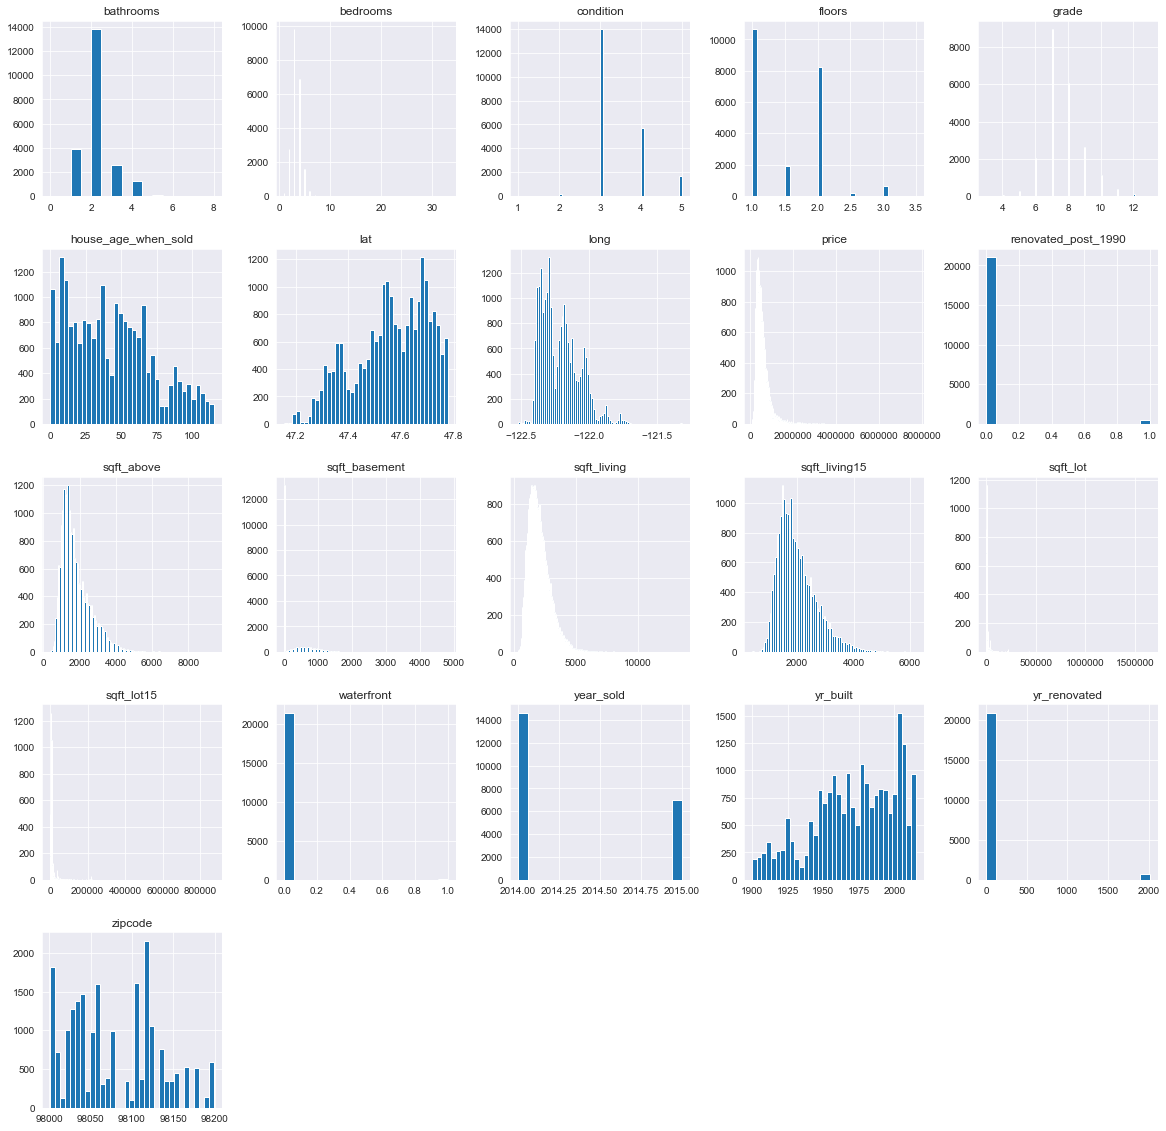

In [25]:
#CREATING HISTOGRAM OF ALL COLUMNS
df.hist(figsize = (20,20), bins = 'auto');

In [26]:
#CREATING OUTLIER LIST TO REMOVE ONLY REMOVE OUTLIERS FROM DESIRED COLUMNS
outliers_list = ['bedrooms','sqft_basement','sqft_above','sqft_living','sqft_lot','sqft_lot15','price']

#GETTING Z SCORES FOR ALL COLUMNS
z = np.abs(stats.zscore(df[outliers_list]))

#REMOVING OUTLIERS (USED Z<= 1.96 TO MAINTAIN 95% OF THE DATA)
df = df[(z<=1.96).all(axis=1)]
df

date     price  ...  house_age_when_sold         Sub_Region
0     2014-10-13  221900.0  ...                   59        South_Urban
1     2014-12-09  538000.0  ...                   63            Seattle
2     2015-02-25  180000.0  ...                   82              North
3     2014-12-09  604000.0  ...                   49            Seattle
4     2015-02-18  510000.0  ...                   28         East_Urban
...          ...       ...  ...                  ...                ...
21592 2014-05-21  360000.0  ...                    5            Seattle
21593 2015-02-23  400000.0  ...                    1  South_and_Seattle
21594 2014-06-23  402101.0  ...                    5            Seattle
21595 2015-01-16  400000.0  ...                   11         East_Urban
21596 2014-10-15  325000.0  ...                    6            Seattle

[18280 rows x 23 columns]

In [27]:
#TURNING SQFT BASEMENT COLUMN INTO BINARY (CONTAINS BASEMENT OR NOT)
df['has_basement'] = 0
for index,basement in enumerate(df['sqft_basement']):
    if basement > 0:
        df['has_basement'][index] = 1
df.drop('sqft_basement',axis = 1, inplace = True)

C:\Users\Biel_\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Biel_\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Biel_\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

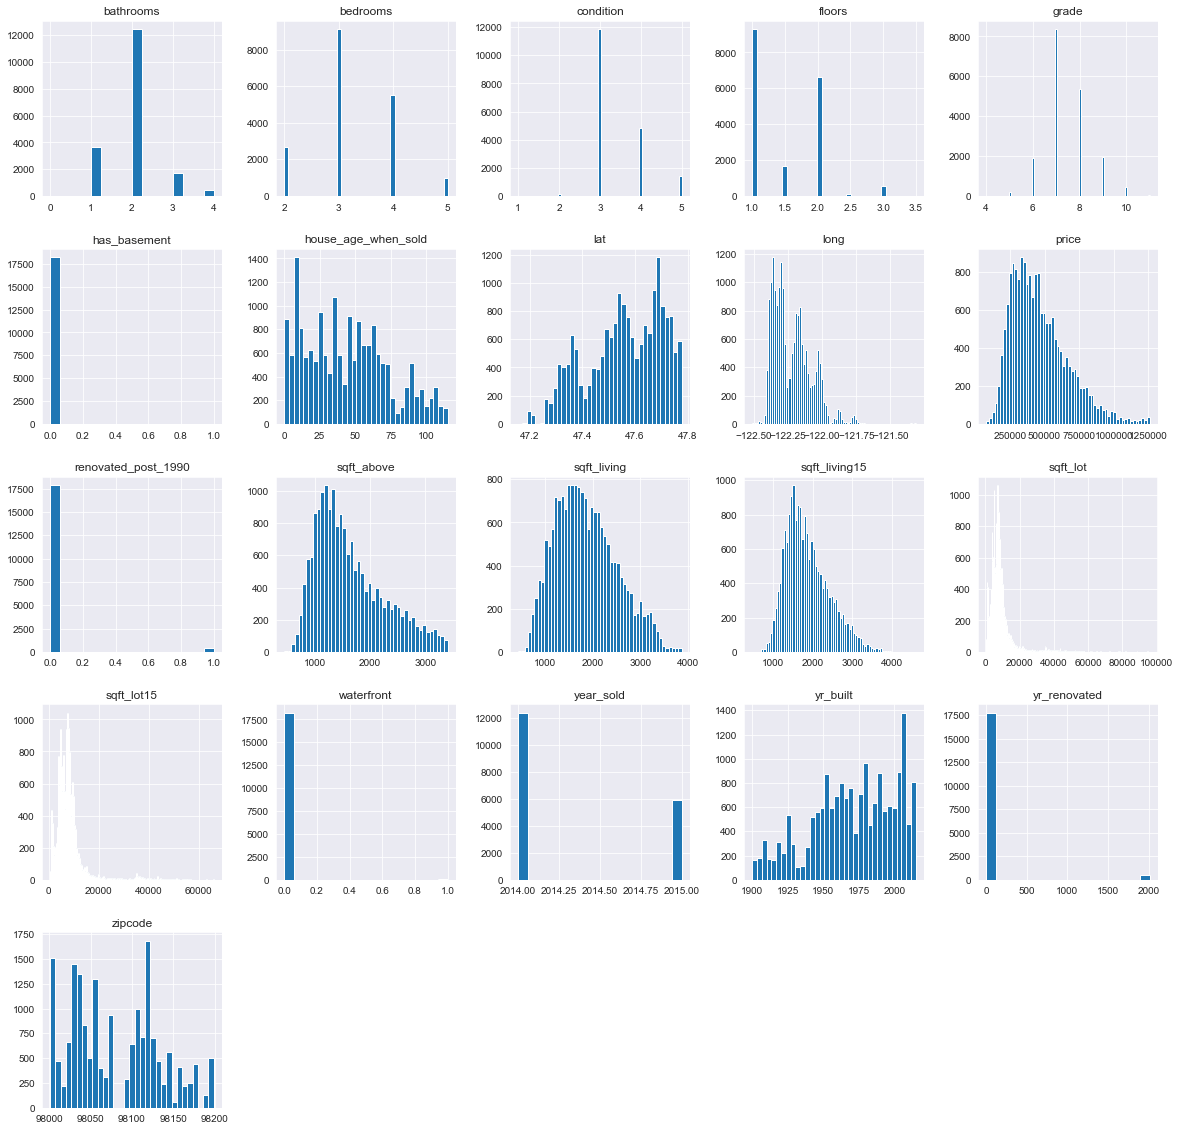

In [28]:
#CHECKING HISTOGRAM FOR ALL COLUMNS AFTER OUTLIERS WERE REMOVED
df.hist(figsize = (20,20), bins = 'auto');

In [29]:
#TURNING COLUMNS TO STRING FOR HOT ENCODING
categories = ['Sub_Region','waterfront','zipcode']
for cat in categories:
    df[cat] = df[cat].astype(str)
categories = ['Sub_Region','waterfront']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18280 entries, 0 to 21596
Data columns (total 23 columns):
date                   18280 non-null datetime64[ns]
price                  18280 non-null float64
bedrooms               18280 non-null int64
bathrooms              18280 non-null int64
sqft_living            18280 non-null int64
sqft_lot               18280 non-null int64
floors                 18280 non-null float64
waterfront             18280 non-null object
condition              18280 non-null int64
grade                  18280 non-null int64
sqft_above             18280 non-null int64
yr_built               18280 non-null int64
yr_renovated           18280 non-null int32
zipcode                18280 non-null object
lat                    18280 non-null float64
long                   18280 non-null float64
sqft_living15          18280 non-null int64
sqft_lot15             18280 non-null int64
year_sold              18280 non-null int64
renovated_post_1990    18280 non-nul

C:\Users\Biel_\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


# EXPLORE

In [30]:
#PLOTTING ALL HOUSES ON A MAP USING LAT AND LONG
import plotly.express as px

fig = px.scatter_mapbox(df, lat="lat", lon="long", hover_name="price", hover_data=['price'],
                        color_discrete_sequence=["fuchsia"], zoom=8.75, height=600, color = 'price')
fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
      ])
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

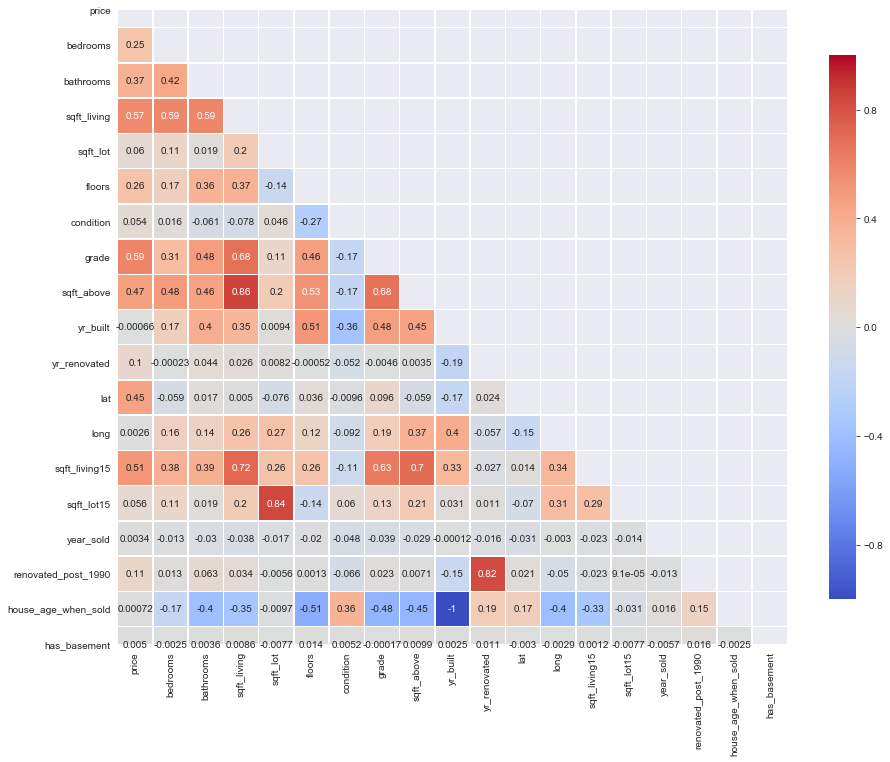

In [31]:
#CORRELATION HEATMAP
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 20))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5});

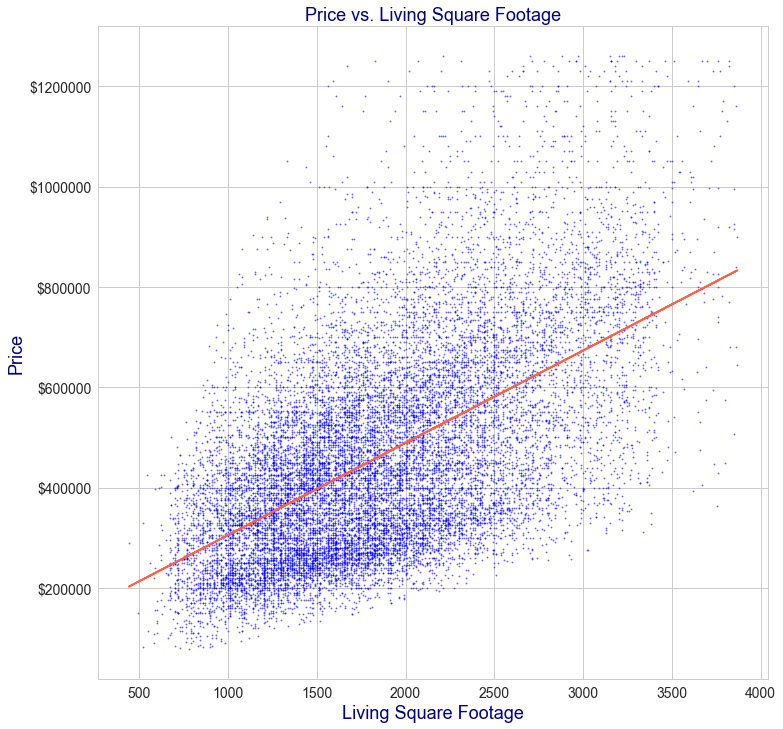

In [110]:
import matplotlib.ticker as ticker
import matplotlib as mpl
mpl.style.use('seaborn-whitegrid')
figure, ax = plt.subplots(figsize=(12,12))

plt.plot('sqft_living','price',data=df,marker='o',markersize=1.8,linestyle='',alpha=0.6,color='blue')

m,b = np.polyfit(df.sqft_living,df.price,1)

formatter = ticker.FormatStrFormatter('$%1.0f')
ax.yaxis.set_major_formatter(formatter)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

ax.set_xlabel('Living Square Footage',fontsize = 18,color='navy')
ax.set_ylabel('Price',fontsize = 18,color='navy')
ax.set_title('Price vs. Living Square Footage' ,fontsize = 18,color='navy')
plt.plot(df.sqft_living,m*df.sqft_living + b,color='tomato')
plt.show()

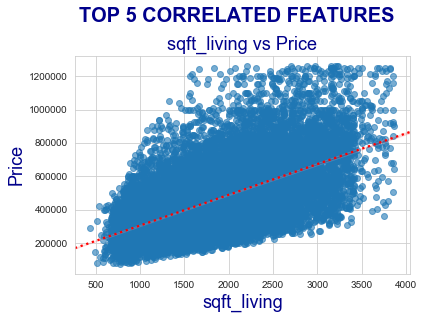

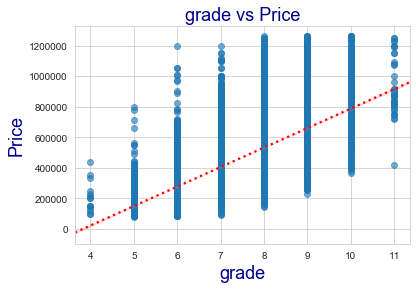

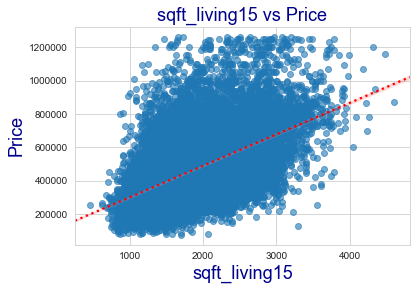

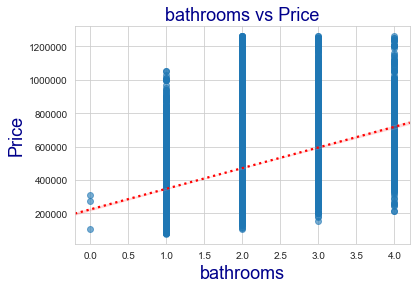

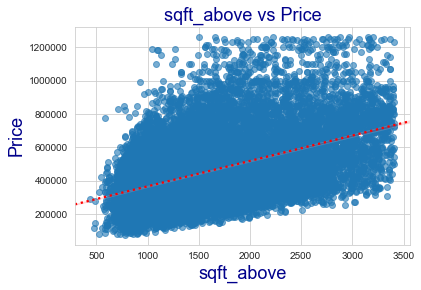

In [31]:
#CREATING SCATTER PLOT WITH TOP 5 CORRELATED COLUMNS WITH PRICE
top_5_cols = ['sqft_living','grade','sqft_living15','bathrooms','sqft_above']
sns.set_style("whitegrid")
plt.suptitle('TOP 5 CORRELATED FEATURES',y=1.05,fontsize=20, color = 'darkblue',weight='bold')
for col in top_5_cols:

    figure = plt.figure
    ax = plt.gca()
    sns.regplot(col,'price',df,ax=ax,scatter_kws=dict(alpha=0.6),line_kws={'color':'red', 'ls':':'})
    ax.set_xlabel(col,fontsize = 18,color='darkblue')
    ax.set_ylabel('Price',fontsize = 18,color='darkblue')
    ax.set_title("{} vs {}".format(col, 'Price'), fontsize = 18,color='darkblue')
    
    plt.show()

The TOP 5 most correlated features with price will be used to create a base model. This model will be used as a starting point so improvements can be made from it.

# BASE MODEL

In [32]:
#DEFINING TARGET AND PREDICTORS
y = 'price'
df_predictors_1 = df[top_5_cols]
X_1 = list(df_predictors_1.columns)

In [33]:
#TEST TRAIN SPLIT (WILL BE USING RANDOM_STATE = 69 THROUGH OUT THE MODEL TO MAKE SURE
#THAT THE SAME DATA SET IS BEING USED IN ALL FUTURE MODELS )
X_train, X_test, y_train, y_test = train_test_split(df[X_1], df[y], test_size=0.25, random_state=69)
print(len(X_train), len(X_test), len(y_train), len(y_test))

13710 4570 13710 4570


In [34]:
#COMBINING XTRAIN YTRAIN AND XTEST YTEST
train_df = pd.concat([y_train,X_train],axis=1)
test_df = pd.concat([y_test,X_test],axis=1)

In [35]:
#FITTING MODEL
predictors = '+'.join(X_train.columns)
formula = y + '~' + predictors
model_1 = ols(formula=formula, data=train_df).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     2041.
Date:                Sat, 15 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:14:11   Log-Likelihood:            -1.8327e+05
No. Observations:               13710   AIC:                         3.666e+05
Df Residuals:                   13704   BIC:                         3.666e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -3.77e+05   1.15e+04    -32.761      0.000      -4e+05   -3.54e+05
sqft_living     146.6933      4.760     30.819      0.000     137.363     156.023
grade          8.616e+04   2040.154     42.232      0.000    8.22e+04    9.02e+04
sqft_living15    45.4670      3.651     12.452      0.000      38.310      52.624
bathrooms     -5489.4877   2723.916     -2.015      0.044   -1.08e+04    -150.239
sqft_above      -90.9775      4.326    -21.029      0.000     -99.458     -82.497
==============================================================================
Omnibus:                     1257.212   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1795.206
Skew:                           0.731   Prob(JB):                         0.00
Kurtosis:                       4.001   Cond. No.                     2.86e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

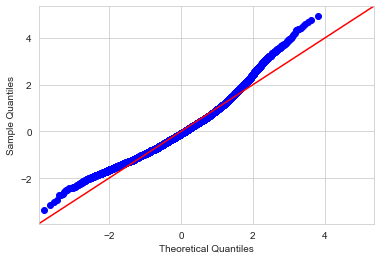

In [36]:
#CHECKING IF RESIDUALS ARE NORMALLY DISTRIBUTED
fig = sm.graphics.qqplot(model_1.resid, dist=stats.norm, line='45', fit=True)

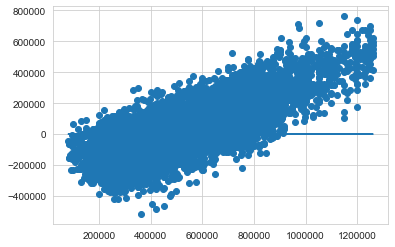

In [37]:
#CHECKING FOR HOMOSCEDACITY
plt.scatter(train_df['price'],model_1.resid)
plt.plot(train_df['price'], [0 for i in range(len(train_df))])

**ANALYSIS**

This base model, which used the top 5 features correlated with price, is only able to explain 43% of variability in price. It is a good starting point to be able to make improvements. The residuals a pretty normally distributed.


# MODEL 2 WITH ALL COLUMNS EXCEPT DATE,ZIPCODE, LAT,LONG

In [38]:
#ONE-HOT ENCODING CATEGORICAL COLUMNS
dummies = pd.get_dummies(df[categories],prefix = categories,drop_first = True)
df_preprocessed_2 = df.drop(categories,axis = 1)
df_preprocessed_2 = pd.concat([df_preprocessed_2,dummies],axis = 1)
df_preprocessed_2

date     price  ...  Sub_Region_West  waterfront_1
0     2014-10-13  221900.0  ...                0             0
1     2014-12-09  538000.0  ...                0             0
2     2015-02-25  180000.0  ...                0             0
3     2014-12-09  604000.0  ...                0             0
4     2015-02-18  510000.0  ...                0             0
...          ...       ...  ...              ...           ...
21592 2014-05-21  360000.0  ...                0             0
21593 2015-02-23  400000.0  ...                0             0
21594 2014-06-23  402101.0  ...                0             0
21595 2015-01-16  400000.0  ...                0             0
21596 2014-10-15  325000.0  ...                0             0

[18280 rows x 31 columns]

In [39]:
#DEFINING TARGET AND PREDICTORS
y = 'price'
df_predictors_2 = df_preprocessed_2.drop(['price','date','zipcode','lat','long'],axis = 1)
X_2 = list(df_predictors_2.columns)

In [40]:
#TEST TRAIN SPLIT
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_preprocessed_2[X_2], df_preprocessed_2[y], test_size=0.25, random_state=69)
print(len(X_train_2), len(X_test_2), len(y_train_2), len(y_test_2))

13710 4570 13710 4570


In [41]:
#COMBINING XTRAIN YTRAIN AND XTEST YTEST
train_df_2 = pd.concat([y_train_2,X_train_2],axis=1)
test_df_2 = pd.concat([y_test_2,X_test_2],axis=1)

In [42]:
#FITTING MODEL
predictors_2 = '+'.join(X_train_2.columns)
formula = y + '~' + predictors_2
model_2 = ols(formula=formula, data=train_df_2).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     1442.
Date:                Sat, 15 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:14:13   Log-Likelihood:            -1.7824e+05
No. Observations:               13710   AIC:                         3.565e+05
Df Residuals:                   13684   BIC:                         3.567e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                    -4.556e+07   3.96e+06    -11.506      0.000   -5.33e+07   -3.78e+07
bedrooms                     -1.194e+04   1534.054     -7.785      0.000   -1.49e+04   -8935.134
bathrooms                      1.49e+04   2033.839      7.328      0.000    1.09e+04    1.89e+04
sqft_living                     97.0150      3.752     25.859      0.000      89.661     104.369
sqft_lot                         1.0377      0.190      5.471      0.000       0.666       1.410
floors                        1.426e+04   2543.904      5.607      0.000    9276.136    1.92e+04
condition                     2.667e+04   1590.378     16.771      0.000    2.36e+04    2.98e+04
grade                         6.741e+04   1583.505     42.573      0.000    6.43e+04    7.05e+04
sqft_above                       1.5436      3.653      0.423      0.673      -5.616       8.703
yr_built                      6950.6237    655.886     10.597      0.000    5664.998    8236.250
yr_renovated                     1.3551      4.961      0.273      0.785      -8.369      11.080
sqft_living15                   56.9098      2.685     21.192      0.000      51.646      62.174
sqft_lot15                      -1.1747      0.239     -4.919      0.000      -1.643      -0.707
year_sold                      1.54e+04   1309.966     11.757      0.000    1.28e+04     1.8e+04
renovated_post_1990           6.362e+04   1.17e+04      5.429      0.000    4.07e+04    8.66e+04
house_age_when_sold           8450.5972    655.018     12.901      0.000    7166.671    9734.523
has_basement                  5.389e+04   2.77e+04      1.945      0.052    -424.750    1.08e+05
Sub_Region_East_Urban         1.088e+05   5111.984     21.280      0.000    9.88e+04    1.19e+05
Sub_Region_North              1.453e+04   6068.045      2.394      0.017    2634.538    2.64e+04
Sub_Region_North_and_Seattle  3.275e+04   6870.533      4.767      0.000    1.93e+04    4.62e+04
Sub_Region_Seattle            1.232e+05   5508.756     22.370      0.000    1.12e+05    1.34e+05
Sub_Region_South_Rural       -7.898e+04   6522.086    -12.110      0.000   -9.18e+04   -6.62e+04
Sub_Region_South_Urban       -9.575e+04   5062.641    -18.912      0.000   -1.06e+05   -8.58e+04
Sub_Region_South_and_Seattle -9631.9031   8953.265     -1.076      0.282   -2.72e+04    7917.727
Sub_Region_Vashon_Island     -2.331e+04   1.86e+04     -1.251      0.211   -5.98e+04    1.32e+04
Sub_Region_West               1.356e+04   1.29e+04      1.049      0.294   -1.18e+04    3.89e+04
waterfront_1                  2.177e+05   1.45e+04     14.999      0.000    1.89e+05    2.46e+05
==============================================================================
Omnibus:                     1955.817   Durbin-Watson:                   2.004
Prob(Omnibus): 

In [43]:
#REMOVING FEATURES WITH P-VALUE > 0.05
summary_2 = model_2.summary()
p_table_2 = summary_2.tables[1]
p_table_2 = pd.DataFrame(p_table_2.data)
p_table_2.columns = p_table_2.iloc[0]
p_table_2 = p_table_2.drop(0)
p_table_2 = p_table_2.set_index(p_table_2.columns[0])
p_table_2['P>|t|'] = p_table_2['P>|t|'].astype(float)
x_cols_2 = list(p_table_2[p_table_2['P>|t|'] < 0.05].index)
x_cols_2.remove('Intercept')
print(len(p_table_2), len(x_cols_2))

27 20


In [44]:
#FITTING REVISED MODEL
predictors_2 = '+'.join(x_cols_2)
formula = y + '~' + predictors_2
model_2 = ols(formula=formula, data=train_df_2).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     1897.
Date:                Sat, 15 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:14:14   Log-Likelihood:            -1.7824e+05
No. Observations:               13710   AIC:                         3.565e+05
Df Residuals:                   13690   BIC:                         3.567e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                    -4.546e+07   3.96e+06    -11.483      0.000   -5.32e+07   -3.77e+07
bedrooms                     -1.193e+04   1533.029     -7.782      0.000   -1.49e+04   -8925.672
bathrooms                     1.462e+04   1981.660      7.375      0.000    1.07e+04    1.85e+04
sqft_living                     98.0249      2.834     34.590      0.000      92.470     103.580
sqft_lot                         1.0338      0.189      5.459      0.000       0.663       1.405
floors                        1.483e+04   2235.459      6.635      0.000    1.05e+04    1.92e+04
condition                     2.663e+04   1582.407     16.831      0.000    2.35e+04    2.97e+04
grade                         6.753e+04   1568.025     43.066      0.000    6.45e+04    7.06e+04
yr_built                      6935.6392    655.803     10.576      0.000    5650.176    8221.103
sqft_living15                   57.4194      2.658     21.602      0.000      52.209      62.630
sqft_lot15                      -1.1364      0.238     -4.784      0.000      -1.602      -0.671
year_sold                     1.537e+04   1309.855     11.732      0.000    1.28e+04    1.79e+04
renovated_post_1990           6.635e+04   6747.413      9.833      0.000    5.31e+04    7.96e+04
house_age_when_sold           8431.5624    654.956     12.873      0.000    7147.758    9715.366
Sub_Region_East_Urban         1.107e+05   4235.269     26.141      0.000    1.02e+05    1.19e+05
Sub_Region_North              1.643e+04   5310.886      3.093      0.002    6016.964    2.68e+04
Sub_Region_North_and_Seattle  3.494e+04   6165.268      5.667      0.000    2.29e+04     4.7e+04
Sub_Region_Seattle            1.254e+05   4483.942     27.961      0.000    1.17e+05    1.34e+05
Sub_Region_South_Rural       -7.687e+04   5889.604    -13.052      0.000   -8.84e+04   -6.53e+04
Sub_Region_South_Urban       -9.358e+04   4149.043    -22.555      0.000   -1.02e+05   -8.54e+04
waterfront_1                  2.141e+05   1.43e+04     14.985      0.000    1.86e+05    2.42e+05
==============================================================================
Omnibus:                     1943.775   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5554.443
Skew:                           0.763   Prob(JB):                         0.00
Kurtosis:                       5.719   Cond. No.                     4.75e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.78e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

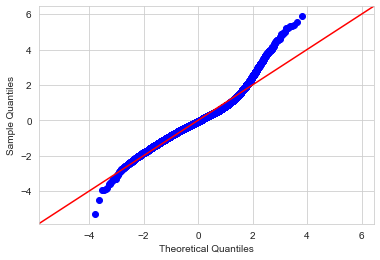

In [45]:
#CHECKING IF RESIDUALS ARE NORMALLY DISTRIBUTED
fig = sm.graphics.qqplot(model_2.resid, dist=stats.norm, line='45', fit=True)

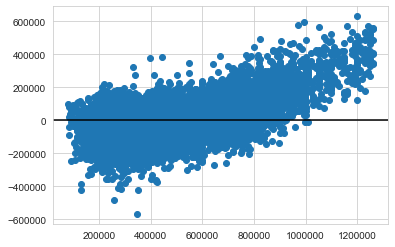

In [46]:
#CHECKING FOR HOMOSCEDACITY
plt.scatter(train_df_2['price'],model_2.resid)
plt.axhline(0,color='black')

**ANALYSIS**

By adding more features to the model, the R^2 value increased to 0.725, which means it can explain 72.5% of variability in house prices. With the extra features, it became more complex and it is fairly difficult to interpret which features are the most important because the data isn't scaled.

# MODEL 3 - DROPPING MULTICOLINEAR COLUMNS (CORR>0.75)

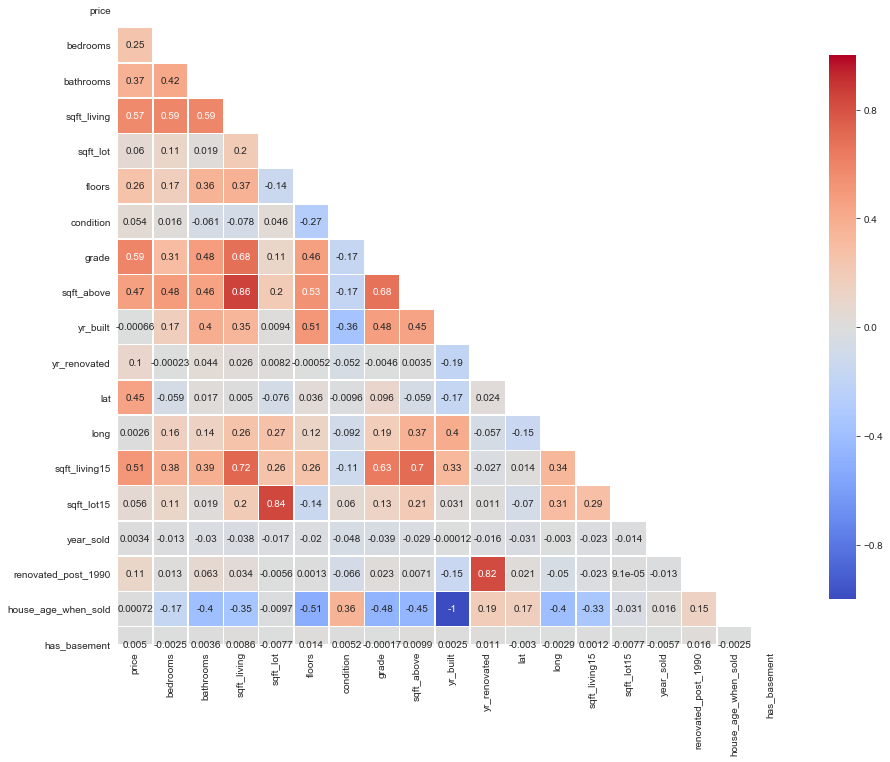

In [47]:
#CORRELATION HEATMAP
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 20))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5});

In [48]:
#DROPPING COLUMNS NOT BEING USED IN MODEL
model3_df = df.drop(['lat','long','zipcode','date'],axis = 1)

#DROPPING COLUMNS WITH HIGH CORRELATION
model3_df = model3_df.drop(['sqft_above','yr_renovated','yr_built','sqft_lot15','sqft_living15'],axis = 1)

# #STARDADIZING DATA EXCEPT TARGET (PRICE) AND CATEGORICAL COLUMNS
# for col in model3_df.drop(['Sub_Region','waterfront','price'],axis=1).columns:
#     model3_df[col] = stats.zscore(model3_df[col])


# model3_df

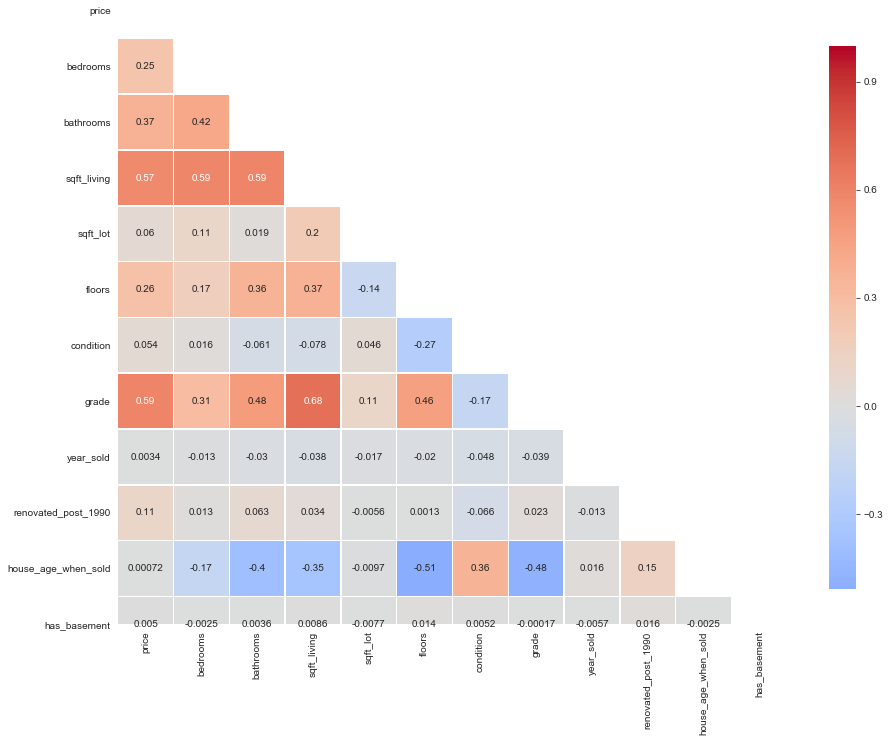

In [49]:
#CORRELATION HEATMAP
corr = model3_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 20))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5});

In [50]:
#HOT ENCODING
dummies = pd.get_dummies(model3_df[categories],prefix = categories,drop_first = True)
df_preprocessed_3 = model3_df.drop(categories,axis = 1)
df_preprocessed_3 = pd.concat([df_preprocessed_3,dummies],axis = 1)
df_preprocessed_3

price  bedrooms  ...  Sub_Region_West  waterfront_1
0      221900.0         3  ...                0             0
1      538000.0         3  ...                0             0
2      180000.0         2  ...                0             0
3      604000.0         4  ...                0             0
4      510000.0         3  ...                0             0
...         ...       ...  ...              ...           ...
21592  360000.0         3  ...                0             0
21593  400000.0         4  ...                0             0
21594  402101.0         2  ...                0             0
21595  400000.0         3  ...                0             0
21596  325000.0         2  ...                0             0

[18280 rows x 22 columns]

In [51]:
#DEFINING TARGET AND PREDICTORS
y = 'price'
df_predictors_3 = df_preprocessed_3.drop('price',axis = 1)
X_3 = list(df_predictors_3.columns)

In [52]:
#TEST-TRAIN SPLIT
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(df_preprocessed_3[X_3], df_preprocessed_3[y], test_size=0.25, random_state=69)
print(len(X_train_3), len(X_test_3), len(y_train_3), len(y_test_3))

13710 4570 13710 4570


In [53]:
#COMBINING XTRAIN YTRAIN AND XTEST YTEST
train_df_3 = pd.concat([y_train_3,X_train_3],axis=1)
test_df_3 = pd.concat([y_test_3,X_test_3],axis=1)

In [54]:
#FITTING MODEL
predictors_3 = '+'.join(X_train_3.columns)
formula = y + '~' + predictors_3
model_3 = ols(formula=formula, data=train_df_3).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     1639.
Date:                Sat, 15 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:14:19   Log-Likelihood:            -1.7847e+05
No. Observations:               13710   AIC:                         3.570e+05
Df Residuals:                   13688   BIC:                         3.571e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                    -4.606e+07   4.03e+06    -11.442      0.000    -5.4e+07   -3.82e+07
bedrooms                     -1.343e+04   1557.621     -8.621      0.000   -1.65e+04   -1.04e+04
bathrooms                     1.247e+04   2012.137      6.200      0.000    8530.537    1.64e+04
sqft_living                    124.2150      2.596     47.850      0.000     119.127     129.303
sqft_lot                         0.4900      0.117      4.202      0.000       0.261       0.719
floors                        1.436e+04   2269.938      6.327      0.000    9913.177    1.88e+04
condition                     2.358e+04   1604.446     14.694      0.000    2.04e+04    2.67e+04
grade                         7.659e+04   1532.528     49.973      0.000    7.36e+04    7.96e+04
year_sold                     2.261e+04   1998.439     11.312      0.000    1.87e+04    2.65e+04
renovated_post_1990           5.492e+04   6841.882      8.026      0.000    4.15e+04    6.83e+04
house_age_when_sold           1577.5628     49.651     31.773      0.000    1480.240    1674.885
has_basement                   5.24e+04   2.82e+04      1.860      0.063   -2828.552    1.08e+05
Sub_Region_East_Urban         1.124e+05   5184.489     21.672      0.000    1.02e+05    1.23e+05
Sub_Region_North               1.27e+04   6148.431      2.066      0.039     652.888    2.48e+04
Sub_Region_North_and_Seattle  2.435e+04   6925.958      3.516      0.000    1.08e+04    3.79e+04
Sub_Region_Seattle             1.11e+05   5414.881     20.507      0.000       1e+05    1.22e+05
Sub_Region_South_Rural       -7.904e+04   6628.165    -11.925      0.000    -9.2e+04    -6.6e+04
Sub_Region_South_Urban           -1e+05   5123.148    -19.527      0.000    -1.1e+05      -9e+04
Sub_Region_South_and_Seattle -2.303e+04   9056.032     -2.543      0.011   -4.08e+04   -5279.344
Sub_Region_Vashon_Island     -3.961e+04   1.89e+04     -2.093      0.036   -7.67e+04   -2512.553
Sub_Region_West               1.183e+04   1.31e+04      0.903      0.367   -1.39e+04    3.75e+04
waterfront_1                  2.231e+05   1.47e+04     15.151      0.000    1.94e+05    2.52e+05
==============================================================================
Omnibus:                     1993.760   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5774.375
Skew:                           0.778   Prob(JB):                         0.00
Kurtosis:                       5.773   Cond. No.                     5.65e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+07. This might indicate that there are
s

In [55]:
#REMOVING FEATURES WITH P-VALUE > 0.05
summary_3 = model_3.summary()
p_table_3 = summary_3.tables[1]
p_table_3 = pd.DataFrame(p_table_3.data)
p_table_3.columns = p_table_3.iloc[0]
p_table_3 = p_table_3.drop(0)
p_table_3 = p_table_3.set_index(p_table_3.columns[0])
p_table_3['P>|t|'] = p_table_3['P>|t|'].astype(float)
x_cols_3 = list(p_table_3[p_table_3['P>|t|'] < 0.05].index)
x_cols_3.remove('Intercept')
print(len(p_table_3), len(x_cols_3))

22 19


In [56]:
#FITTING REVISED MODEL
predictors_3 = '+'.join(x_cols_3)
formula = y + '~' + predictors_3
model_3 = ols(formula=formula, data=train_df_3).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     1811.
Date:                Sat, 15 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:14:19   Log-Likelihood:            -1.7847e+05
No. Observations:               13710   AIC:                         3.570e+05
Df Residuals:                   13690   BIC:                         3.571e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                    -4.603e+07   4.03e+06    -11.433      0.000   -5.39e+07   -3.81e+07
bedrooms                     -1.343e+04   1557.741     -8.623      0.000   -1.65e+04   -1.04e+04
bathrooms                     1.241e+04   2011.947      6.170      0.000    8470.397    1.64e+04
sqft_living                    124.1859      2.596     47.842      0.000     119.098     129.274
sqft_lot                         0.5051      0.115      4.382      0.000       0.279       0.731
floors                        1.437e+04   2269.866      6.330      0.000    9918.584    1.88e+04
condition                     2.361e+04   1604.459     14.714      0.000    2.05e+04    2.68e+04
grade                          7.67e+04   1527.309     50.221      0.000    7.37e+04    7.97e+04
year_sold                     2.259e+04   1998.587     11.302      0.000    1.87e+04    2.65e+04
renovated_post_1990             5.5e+04   6841.314      8.039      0.000    4.16e+04    6.84e+04
house_age_when_sold           1577.4409     49.647     31.773      0.000    1480.125    1674.757
Sub_Region_East_Urban         1.109e+05   4893.014     22.661      0.000    1.01e+05     1.2e+05
Sub_Region_North              1.117e+04   5905.563      1.892      0.059    -402.222    2.27e+04
Sub_Region_North_and_Seattle  2.299e+04   6731.400      3.416      0.001    9799.287    3.62e+04
Sub_Region_Seattle            1.097e+05   5182.185     21.171      0.000    9.96e+04     1.2e+05
Sub_Region_South_Rural       -8.052e+04   6424.437    -12.534      0.000   -9.31e+04   -6.79e+04
Sub_Region_South_Urban       -1.015e+05   4850.928    -20.915      0.000   -1.11e+05   -9.19e+04
Sub_Region_South_and_Seattle -2.445e+04   8915.181     -2.742      0.006   -4.19e+04   -6970.184
Sub_Region_Vashon_Island     -4.137e+04   1.88e+04     -2.198      0.028   -7.83e+04   -4473.404
waterfront_1                  2.229e+05   1.47e+04     15.140      0.000    1.94e+05    2.52e+05
==============================================================================
Omnibus:                     1986.863   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5742.183
Skew:                           0.776   Prob(JB):                         0.00
Kurtosis:                       5.765   Cond. No.                     5.65e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
#REMOVING SCIENTIFIC NOTATION
pd.set_option('display.float_format', lambda x: '%.5f' % x)

#GETTING COEF VALUES
model_3.params.sort_values()


Intercept                      -46029308.56672
Sub_Region_South_Urban           -101458.15325
Sub_Region_South_Rural            -80520.71437
Sub_Region_Vashon_Island          -41369.11588
Sub_Region_South_and_Seattle      -24445.16219
bedrooms                          -13432.25284
sqft_lot                               0.50514
sqft_living                          124.18595
house_age_when_sold                 1577.44094
Sub_Region_North                   11173.49151
bathrooms                          12414.08896
floors                             14367.83268
year_sold                          22588.72085
Sub_Region_North_and_Seattle       22993.75610
condition                          23608.49011
renovated_post_1990                54999.50283
grade                              76702.26426
Sub_Region_Seattle                109711.34335
Sub_Region_East_Urban             110879.16802
waterfront_1                      222916.13562
dtype: float64

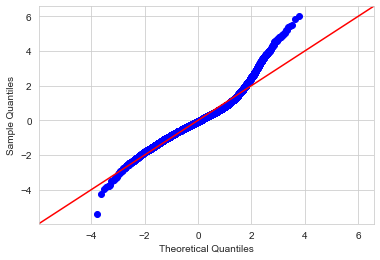

In [58]:
#CHECKING IF RESIDUALS ARE NORMALLY DISTRIBUTED
fig = sm.graphics.qqplot(model_3.resid, dist=stats.norm, line='45', fit=True)

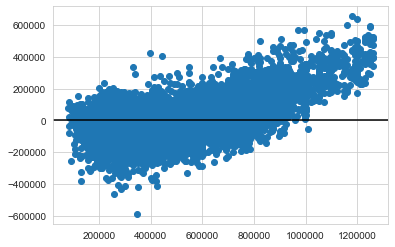

In [59]:
#CHECKING FOR HOMOSCEDACITY
plt.scatter(train_df_3['price'],model_3.resid)
plt.axhline(0,color='black')

In [60]:
#FITTING MODEL WITH TEST DATA
predictors_3 = '+'.join(X_train_3.columns)
formula = y + '~' + predictors_3
model_3_test = ols(formula=formula, data=test_df_3).fit()
model_3_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     551.6
Date:                Sat, 15 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:14:21   Log-Likelihood:                -59588.
No. Observations:                4570   AIC:                         1.192e+05
Df Residuals:                    4548   BIC:                         1.194e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                    -4.296e+07   7.14e+06     -6.016      0.000    -5.7e+07    -2.9e+07
bedrooms                     -8752.6332   2747.662     -3.185      0.001   -1.41e+04   -3365.882
bathrooms                     1.539e+04   3547.250      4.339      0.000    8436.965    2.23e+04
sqft_living                    125.6005      4.540     27.667      0.000     116.700     134.501
sqft_lot                         0.4589      0.198      2.319      0.020       0.071       0.847
floors                         1.27e+04   4108.585      3.091      0.002    4645.932    2.08e+04
condition                     2.946e+04   2836.837     10.384      0.000    2.39e+04     3.5e+04
grade                         7.178e+04   2659.449     26.990      0.000    6.66e+04     7.7e+04
year_sold                     2.107e+04   3544.872      5.944      0.000    1.41e+04     2.8e+04
renovated_post_1990           4.929e+04   1.23e+04      4.009      0.000    2.52e+04    7.34e+04
house_age_when_sold           1398.1294     89.077     15.696      0.000    1223.496    1572.763
has_basement                 -5.361e+04   3.73e+04     -1.436      0.151   -1.27e+05    1.96e+04
Sub_Region_East_Urban         1.084e+05   9646.507     11.237      0.000    8.95e+04    1.27e+05
Sub_Region_North              3713.3234   1.13e+04      0.329      0.742   -1.84e+04    2.59e+04
Sub_Region_North_and_Seattle  1.589e+04   1.25e+04      1.269      0.204   -8656.168    4.04e+04
Sub_Region_Seattle            1.121e+05      1e+04     11.173      0.000    9.25e+04    1.32e+05
Sub_Region_South_Rural       -9.299e+04   1.19e+04     -7.799      0.000   -1.16e+05   -6.96e+04
Sub_Region_South_Urban       -1.101e+05   9482.240    -11.608      0.000   -1.29e+05   -9.15e+04
Sub_Region_South_and_Seattle -1.914e+04   1.71e+04     -1.122      0.262   -5.26e+04    1.43e+04
Sub_Region_Vashon_Island      1971.6722   2.67e+04      0.074      0.941   -5.03e+04    5.43e+04
Sub_Region_West               2.276e+04   2.01e+04      1.134      0.257   -1.66e+04    6.21e+04
waterfront_1                  2.156e+05   3.29e+04      6.549      0.000    1.51e+05     2.8e+05
==============================================================================
Omnibus:                      920.514   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3368.166
Skew:                           0.974   Prob(JB):                         0.00
Kurtosis:                       6.728   Cond. No.                     5.83e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.83e+07. This might indicate that there are
s

In [61]:
#REMOVING FEATURES WITH P-VALUE > 0.05
summary_3_test = model_3_test.summary()
p_table_3_test = summary_3_test.tables[1]
p_table_3_test = pd.DataFrame(p_table_3_test.data)
p_table_3_test.columns = p_table_3_test.iloc[0]
p_table_3_test = p_table_3_test.drop(0)
p_table_3_test = p_table_3_test.set_index(p_table_3_test.columns[0])
p_table_3_test['P>|t|'] = p_table_3_test['P>|t|'].astype(float)
x_cols_3_test = list(p_table_3_test[p_table_3_test['P>|t|'] < 0.05].index)
x_cols_3_test.remove('Intercept')
print(len(p_table_3_test), len(x_cols_3_test))

22 15


In [62]:
#FITTING REVISED TEST MODEL
predictors_3_test = '+'.join(x_cols_3_test)
formula = y + '~' + predictors_3_test
model_3_test = ols(formula=formula, data=test_df_3).fit()
model_3_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     771.3
Date:                Sat, 15 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:14:21   Log-Likelihood:                -59592.
No. Observations:                4570   AIC:                         1.192e+05
Df Residuals:                    4554   BIC:                         1.193e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -4.277e+07   7.14e+06     -5.991      0.000   -5.68e+07   -2.88e+07
bedrooms               -8651.7160   2742.146     -3.155      0.002    -1.4e+04   -3275.781
bathrooms               1.534e+04   3542.155      4.331      0.000    8398.021    2.23e+04
sqft_living              124.9853      4.529     27.598      0.000     116.107     133.864
sqft_lot                   0.4888      0.190      2.570      0.010       0.116       0.862
floors                  1.239e+04   4092.443      3.027      0.002    4365.935    2.04e+04
condition               2.965e+04   2826.036     10.493      0.000    2.41e+04    3.52e+04
grade                   7.249e+04   2633.237     27.529      0.000    6.73e+04    7.77e+04
year_sold               2.098e+04   3543.935      5.919      0.000     1.4e+04    2.79e+04
renovated_post_1990     4.932e+04   1.23e+04      4.014      0.000    2.52e+04    7.34e+04
house_age_when_sold     1398.5942     88.294     15.840      0.000    1225.495    1571.693
Sub_Region_East_Urban   1.033e+05   5535.029     18.665      0.000    9.25e+04    1.14e+05
Sub_Region_Seattle      1.074e+05   5877.434     18.276      0.000    9.59e+04    1.19e+05
Sub_Region_South_Rural -9.787e+04   9136.528    -10.712      0.000   -1.16e+05      -8e+04
Sub_Region_South_Urban  -1.15e+05   5280.372    -21.776      0.000   -1.25e+05   -1.05e+05
waterfront_1            2.151e+05   3.24e+04      6.645      0.000    1.52e+05    2.79e+05
==============================================================================
Omnibus:                      911.704   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3345.395
Skew:                           0.964   Prob(JB):                         0.00
Kurtosis:                       6.722   Cond. No.                     5.82e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.82e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
#GETTING REVISED MODEL COEF
model_3_test.params.sort_values()

Intercept                -42773994.91639
Sub_Region_South_Urban     -114984.26910
Sub_Region_South_Rural      -97871.84226
bedrooms                     -8651.71604
sqft_lot                         0.48879
sqft_living                    124.98529
house_age_when_sold           1398.59421
floors                       12389.10871
bathrooms                    15342.36220
year_sold                    20976.85543
condition                    29654.23219
renovated_post_1990          49322.77078
grade                        72490.08802
Sub_Region_East_Urban       103313.59040
Sub_Region_Seattle          107413.32635
waterfront_1                215142.06320
dtype: float64

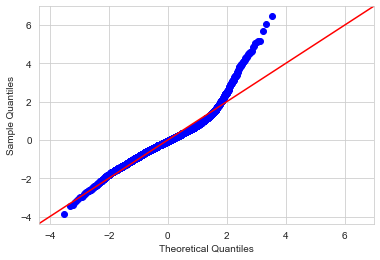

In [64]:
#CHECKING IF RESIDUALS ARE NORMALLY DISTRIBUTED
fig = sm.graphics.qqplot(model_3_test.resid, dist=stats.norm, line='45', fit=True)

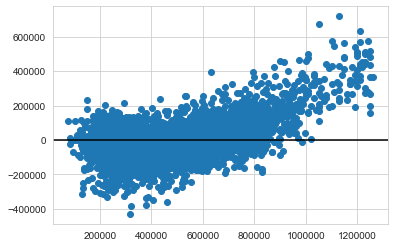

In [65]:
#CHECKING FOR HOMOSCEDACITY
plt.scatter(test_df_3['price'],model_3_test.resid)
plt.axhline(0,color='black')

**ANALYSIS**

By removing multicolinear columns,the R^2 value dropped by 1% to 71.7%, but by doing so, the model became simpler and the condition number dropped to an acceptable level.The test model confirmed the validity of the model, with both the train and test models varying by less than 1%. The residuals aren't completely normally distributed with the model having difficulties with high priced houses.

# 1 - WHICH CREATES A BETTER MODEL, ZIPCODES OR SUB REGIONS?

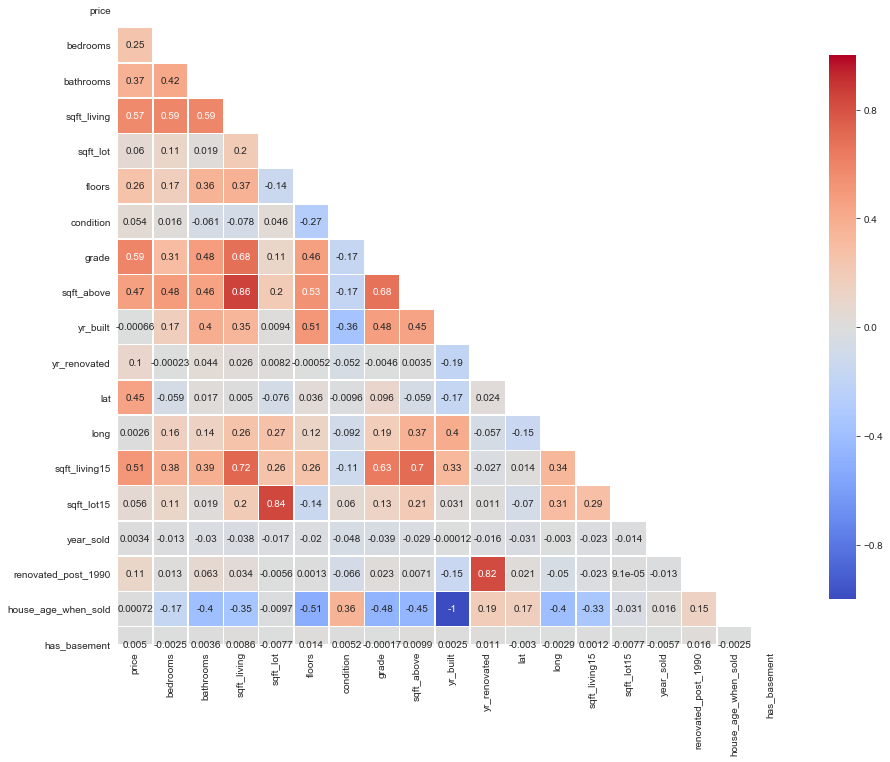

In [66]:
#CORRELATION HEATMAP
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 20))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5});

In [67]:
#DROPPING COLUMNS NOT BEING USED IN MODEL
model6_df = df.drop(['lat','long','Sub_Region','date'],axis = 1)

#DROPPING COLUMNS WITH HIGH CORRELATION
model6_df = model6_df.drop(['sqft_above','yr_renovated','yr_built','sqft_lot15','sqft_living15'],axis = 1)
    
model6_df

price  bedrooms  ...  house_age_when_sold  has_basement
0     221900.00000         3  ...                   59             0
1     538000.00000         3  ...                   63             1
2     180000.00000         2  ...                   82             0
3     604000.00000         4  ...                   49             1
4     510000.00000         3  ...                   28             0
...            ...       ...  ...                  ...           ...
21592 360000.00000         3  ...                    5             0
21593 400000.00000         4  ...                    1             0
21594 402101.00000         2  ...                    5             0
21595 400000.00000         3  ...                   11             0
21596 325000.00000         2  ...                    6             0

[18280 rows x 14 columns]

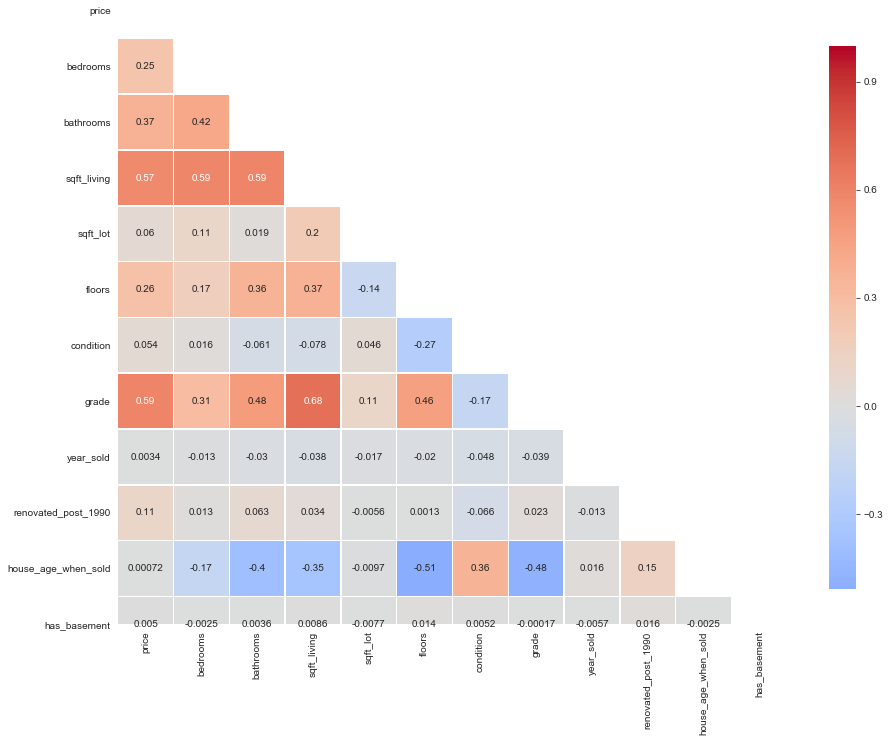

In [68]:
#CORRELATION HEATMAP
corr = model6_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 20))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5});

In [69]:
# #TURNING COLUMNS TO STRING FOR HOT ENCODING
categories_2 = ['zipcode','waterfront']

#HOT ENCODING
dummies = pd.get_dummies(model6_df[categories_2],prefix = categories_2,drop_first = True)
df_preprocessed_6 = model6_df.drop(categories_2,axis = 1)
df_preprocessed_6 = pd.concat([df_preprocessed_6,dummies],axis = 1)
df_preprocessed_6

price  bedrooms  ...  zipcode_98199  waterfront_1
0     221900.00000         3  ...              0             0
1     538000.00000         3  ...              0             0
2     180000.00000         2  ...              0             0
3     604000.00000         4  ...              0             0
4     510000.00000         3  ...              0             0
...            ...       ...  ...            ...           ...
21592 360000.00000         3  ...              0             0
21593 400000.00000         4  ...              0             0
21594 402101.00000         2  ...              0             0
21595 400000.00000         3  ...              0             0
21596 325000.00000         2  ...              0             0

[18280 rows x 82 columns]

In [70]:
#DEFINING TARGET AND PREDICTORS
y = 'price'
df_predictors_6 = df_preprocessed_6.drop('price',axis = 1)
X_6 = list(df_predictors_6.columns)

In [71]:
#TRAIN-TEST SPLIT
X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(df_preprocessed_6[X_6], df_preprocessed_6[y], test_size=0.25, random_state=69)
print(len(X_train_6), len(X_test_6), len(y_train_6), len(y_test_6))

13710 4570 13710 4570


In [72]:
#COMBINING XTRAIN YTRAIN AND XTEST YTEST
train_df_6 = pd.concat([y_train_6,X_train_6],axis=1)
test_df_6 = pd.concat([y_test_6,X_test_6],axis=1)

In [73]:
#FITTING MODEL
predictors_6 = '+'.join(X_train_6.columns)
formula = y + '~' + predictors_6
model_6 = ols(formula=formula, data=train_df_6).fit()
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     728.7
Date:                Sat, 15 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:14:27   Log-Likelihood:            -1.7561e+05
No. Observations:               13710   AIC:                         3.514e+05
Df Residuals:                   13628   BIC:                         3.520e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -5.122e+07   3.29e+06    -15.585      0.000   -5.77e+07   -4.48e+07
bedrooms            -7993.1521   1282.423     -6.233      0.000   -1.05e+04   -5479.425
bathrooms            4111.1138   1653.132      2.487      0.013     870.746    7351.482
sqft_living           132.9411      2.160     61.538      0.000     128.707     137.176
sqft_lot                1.1131      0.099     11.246      0.000       0.919       1.307
floors               1358.1235   1920.147      0.707      0.479   -2405.630    5121.877
condition            2.146e+04   1336.477     16.056      0.000    1.88e+04    2.41e+04
grade                5.589e+04   1310.601     42.648      0.000    5.33e+04    5.85e+04
year_sold            2.519e+04   1631.332     15.444      0.000     2.2e+04    2.84e+04
renovated_post_1990  5.152e+04   5591.472      9.214      0.000    4.06e+04    6.25e+04
house_age_when_sold   713.3850     43.305     16.474      0.000     628.502     798.268
has_basement         2.748e+04    2.3e+04      1.196      0.232   -1.76e+04    7.25e+04
zipcode_98002        8134.5146   9216.070      0.883      0.377   -9930.256    2.62e+04
zipcode_98003       -3377.6492   8439.820     -0.400      0.689   -1.99e+04    1.32e+04
zipcode_98004        5.123e+05   9854.760     51.982      0.000    4.93e+05    5.32e+05
zipcode_98005        3.323e+05   1.08e+04     30.671      0.000    3.11e+05    3.54e+05
zipcode_98006        2.663e+05   8097.513     32.885      0.000     2.5e+05    2.82e+05
zipcode_98007        2.519e+05   1.09e+04     23.018      0.000     2.3e+05    2.73e+05
zipcode_98008        2.384e+05   8598.935     27.721      0.000    2.22e+05    2.55e+05
zipcode_98010        8.066e+04   1.36e+04      5.926      0.000     5.4e+04    1.07e+05
zipcode_98011        1.472e+05   9568.839     15.385      0.000    1.28e+05    1.66e+05
zipcode_98014        9.398e+04   1.36e+04      6.898      0.000    6.73e+04    1.21e+05
zipcode_98019        9.584e+04   1.01e+04      9.480      0.000     7.6e+04    1.16e+05
zipcode_98022        8729.1724   9561.066      0.913      0.361      -1e+04    2.75e+04
zipcode_98023       -2.024e+04   7291.380     -2.776      0.006   -3.45e+04   -5946.170
zipcode_98024        1.232e+05   1.77e+04      6.968      0.000    8.85e+04    1.58e+05
zipcode_98027        2.009e+05   8182.256     24.549      0.000    1.85e+05    2.17e+05
zipcode_98028        1.322e+05   8580.510     15.411      0.000    1.15e+05    1.49e+05
zipcode_98029        2.233e+05   8129.919     27.461      0.000    2.07e+05    2.39e+05
zipcode_98030       -1905.2451   8727.498     -0.218      0.827    -1.9e+04    1.52e+04
zipcode_98031        6962.3085   8524.634      0.817      0.414   -9747.151    2.37e+04
zipcode_98032         918.9356   1.15e+04      0.080      0.936   -2.16e+04    2.34e+04
zip

In [74]:
#REMOVING FEATURES WITH P-VALUE > 0.05
summary_6 = model_6.summary()
p_table_6 = summary_6.tables[1]
p_table_6 = pd.DataFrame(p_table_6.data)
p_table_6.columns = p_table_6.iloc[0]
p_table_6 = p_table_6.drop(0)
p_table_6 = p_table_6.set_index(p_table_6.columns[0])
p_table_6['P>|t|'] = p_table_6['P>|t|'].astype(float)
x_cols_6 = list(p_table_6[p_table_6['P>|t|'] < 0.05].index)
x_cols_6.remove('Intercept')
print(len(p_table_6), len(x_cols_6))

82 72


In [75]:
#FTTING REVISED MODEL
predictors_6 = '+'.join(x_cols_6)
formula = y + '~' + predictors_6
model_6 = ols(formula=formula, data=train_df_6).fit()
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     819.9
Date:                Sat, 15 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:14:28   Log-Likelihood:            -1.7562e+05
No. Observations:               13710   AIC:                         3.514e+05
Df Residuals:                   13637   BIC:                         3.519e+05
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -5.126e+07   3.29e+06    -15.602      0.000   -5.77e+07   -4.48e+07
bedrooms            -7976.6891   1281.562     -6.224      0.000   -1.05e+04   -5464.651
bathrooms            4088.9121   1652.088      2.475      0.013     850.592    7327.232
sqft_living           133.2065      2.139     62.269      0.000     129.013     137.400
sqft_lot                1.1065      0.098     11.264      0.000       0.914       1.299
condition            2.158e+04   1329.455     16.234      0.000     1.9e+04    2.42e+04
grade                5.587e+04   1299.955     42.979      0.000    5.33e+04    5.84e+04
year_sold            2.522e+04   1630.791     15.463      0.000     2.2e+04    2.84e+04
renovated_post_1990  5.206e+04   5582.632      9.326      0.000    4.11e+04     6.3e+04
house_age_when_sold   697.0412     39.784     17.521      0.000     619.059     775.024
zipcode_98004         5.09e+05   8469.782     60.097      0.000    4.92e+05    5.26e+05
zipcode_98005        3.285e+05   9594.782     34.242      0.000     3.1e+05    3.47e+05
zipcode_98006        2.627e+05   6336.902     41.454      0.000     2.5e+05    2.75e+05
zipcode_98007        2.487e+05   9712.995     25.608      0.000     2.3e+05    2.68e+05
zipcode_98008        2.347e+05   6962.539     33.703      0.000    2.21e+05    2.48e+05
zipcode_98010        7.725e+04   1.27e+04      6.097      0.000    5.24e+04    1.02e+05
zipcode_98011        1.437e+05   8151.533     17.633      0.000    1.28e+05     1.6e+05
zipcode_98014        9.054e+04   1.27e+04      7.131      0.000    6.57e+04    1.15e+05
zipcode_98019        9.254e+04   8783.641     10.535      0.000    7.53e+04     1.1e+05
zipcode_98023       -2.384e+04   5278.619     -4.516      0.000   -3.42e+04   -1.35e+04
zipcode_98024          1.2e+05    1.7e+04      7.075      0.000    8.67e+04    1.53e+05
zipcode_98027        1.976e+05   6464.363     30.564      0.000    1.85e+05     2.1e+05
zipcode_98028        1.287e+05   6967.894     18.475      0.000    1.15e+05    1.42e+05
zipcode_98029        2.201e+05   6368.817     34.561      0.000    2.08e+05    2.33e+05
zipcode_98033        3.247e+05   6046.072     53.701      0.000    3.13e+05    3.37e+05
zipcode_98034        1.839e+05   5147.176     35.720      0.000    1.74e+05    1.94e+05
zipcode_98038        3.769e+04   5159.769      7.305      0.000    2.76e+04    4.78e+04
zipcode_98039        6.508e+05   3.63e+04     17.924      0.000     5.8e+05    7.22e+05
zipcode_98040         4.33e+05   9272.867     46.692      0.000    4.15e+05    4.51e+05
zipcode_98045        9.864e+04   7611.349     12.960      0.000    8.37e+04    1.14e+05
zipcode_98052        2.454e+05   5077.785     48.322      0.000    2.35e+05    2.55e+05
zipcode_98053         2.41e+05   6401.721     37.650      0.000    2.28e+05    2.54e+05
zip

In [76]:
#GETTING MODEL COEF
model_6.params.sort_values()

Intercept       -51257355.82688
zipcode_98092      -25560.54006
zipcode_98023      -23840.41820
bedrooms            -7976.68906
sqft_lot                1.10646
                      ...      
zipcode_98109      414962.28927
zipcode_98040      432971.21730
zipcode_98112      435989.64292
zipcode_98004      509011.20458
zipcode_98039      650823.89140
Length: 73, dtype: float64

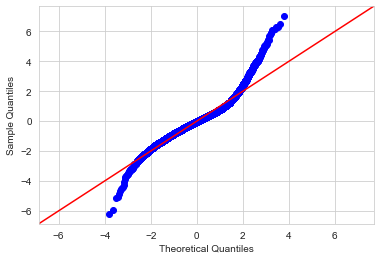

In [77]:
#CHECKING IF RESIDUALS ARE NORMALLY DISTRIBUTED
fig = sm.graphics.qqplot(model_6.resid, dist=stats.norm, line='45', fit=True)

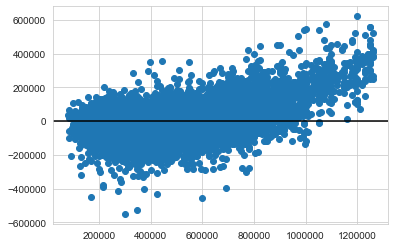

In [78]:
#CHECKING FOR HOMOSCEDACITY
plt.scatter(train_df_6['price'],model_6.resid)
plt.axhline(0,color='black')

In [79]:
#FITTING MODEL WITH TEST DATA
predictors_6 = '+'.join(X_train_6.columns)
formula = y + '~' + predictors_6
model_6_test = ols(formula=formula, data=test_df_6).fit()
model_6_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     258.7
Date:                Sat, 15 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:14:31   Log-Likelihood:                -58517.
No. Observations:                4570   AIC:                         1.172e+05
Df Residuals:                    4488   BIC:                         1.177e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -4.576e+07   5.74e+06     -7.973      0.000    -5.7e+07   -3.45e+07
bedrooms            -4897.4911   2227.065     -2.199      0.028   -9263.635    -531.347
bathrooms            7817.5936   2864.864      2.729      0.006    2201.048    1.34e+04
sqft_living           134.0627      3.721     36.025      0.000     126.767     141.358
sqft_lot                0.8809      0.165      5.341      0.000       0.558       1.204
floors              -2514.0348   3425.304     -0.734      0.463   -9229.318    4201.248
condition            2.267e+04   2341.347      9.684      0.000    1.81e+04    2.73e+04
grade                5.265e+04   2208.300     23.841      0.000    4.83e+04     5.7e+04
year_sold            2.249e+04   2848.858      7.894      0.000    1.69e+04    2.81e+04
renovated_post_1990  5.499e+04   9909.539      5.549      0.000    3.56e+04    7.44e+04
house_age_when_sold   531.7060     76.303      6.968      0.000     382.114     681.298
has_basement        -2.371e+04      3e+04     -0.789      0.430   -8.26e+04    3.52e+04
zipcode_98002        1.523e+04   1.73e+04      0.882      0.378   -1.86e+04    4.91e+04
zipcode_98003       -3088.8971   1.46e+04     -0.212      0.833   -3.17e+04    2.55e+04
zipcode_98004        6.129e+05   1.79e+04     34.221      0.000    5.78e+05    6.48e+05
zipcode_98005        3.205e+05   1.85e+04     17.329      0.000    2.84e+05    3.57e+05
zipcode_98006        2.759e+05   1.38e+04     19.964      0.000    2.49e+05    3.03e+05
zipcode_98007         2.54e+05   1.91e+04     13.296      0.000    2.17e+05    2.91e+05
zipcode_98008        2.333e+05   1.59e+04     14.685      0.000    2.02e+05    2.64e+05
zipcode_98010        7.536e+04   2.32e+04      3.243      0.001    2.98e+04    1.21e+05
zipcode_98011        1.429e+05    1.7e+04      8.426      0.000     1.1e+05    1.76e+05
zipcode_98014        1.116e+05   2.18e+04      5.115      0.000    6.88e+04    1.54e+05
zipcode_98019        1.109e+05   1.71e+04      6.497      0.000    7.74e+04    1.44e+05
zipcode_98022        6621.8389   1.77e+04      0.374      0.709   -2.81e+04    4.14e+04
zipcode_98023       -2.006e+04   1.29e+04     -1.556      0.120   -4.53e+04    5216.068
zipcode_98024        1.648e+05   3.13e+04      5.264      0.000    1.03e+05    2.26e+05
zipcode_98027        1.994e+05   1.48e+04     13.517      0.000     1.7e+05    2.28e+05
zipcode_98028         1.34e+05   1.44e+04      9.320      0.000    1.06e+05    1.62e+05
zipcode_98029        2.315e+05    1.5e+04     15.427      0.000    2.02e+05    2.61e+05
zipcode_98030        1.916e+04   1.45e+04      1.320      0.187   -9305.100    4.76e+04
zipcode_98031        2.121e+04   1.44e+04      1.477      0.140   -6944.232    4.94e+04
zipcode_98032       -1.098e+04    1.8e+04     -0.609      0.542   -4.63e+04    2.43e+04
zip

In [80]:
#REMOVING FEATURES WITH P-VALUE > 0.05
summary_6_test = model_6_test.summary()
p_table_6_test = summary_6_test.tables[1]
p_table_6_test = pd.DataFrame(p_table_6_test.data)
p_table_6_test.columns = p_table_6_test.iloc[0]
p_table_6_test = p_table_6_test.drop(0)
p_table_6_test = p_table_6_test.set_index(p_table_6_test.columns[0])
p_table_6_test['P>|t|'] = p_table_6_test['P>|t|'].astype(float)
x_cols_6_test = list(p_table_6_test[p_table_6_test['P>|t|'] < 0.05].index)
x_cols_6_test.remove('Intercept')
print(len(p_table_6_test), len(x_cols_6_test))

82 69


In [81]:
#FITTING REVISED TEST MODEL
predictors_6_test = '+'.join(x_cols_6_test)
formula = y + '~' + predictors_6_test
model_6_test = ols(formula=formula, data=test_df_6).fit()
model_6_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     302.0
Date:                Sat, 15 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:14:31   Log-Likelihood:                -58532.
No. Observations:                4570   AIC:                         1.172e+05
Df Residuals:                    4500   BIC:                         1.177e+05
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -4.589e+07   5.74e+06     -7.996      0.000   -5.71e+07   -3.46e+07
bedrooms            -4823.9313   2227.543     -2.166      0.030   -9191.009    -456.853
bathrooms            8072.0575   2861.386      2.821      0.005    2462.334    1.37e+04
sqft_living           133.2801      3.679     36.230      0.000     126.068     140.492
sqft_lot                0.9133      0.163      5.603      0.000       0.594       1.233
condition            2.314e+04   2323.861      9.957      0.000    1.86e+04    2.77e+04
grade                5.188e+04   2193.271     23.652      0.000    4.76e+04    5.62e+04
year_sold            2.255e+04   2848.555      7.918      0.000     1.7e+04    2.81e+04
renovated_post_1990  5.409e+04   9900.191      5.463      0.000    3.47e+04    7.35e+04
house_age_when_sold   546.0362     70.418      7.754      0.000     407.983     684.090
zipcode_98004        6.113e+05   1.53e+04     40.030      0.000    5.81e+05    6.41e+05
zipcode_98005         3.19e+05    1.6e+04     19.986      0.000    2.88e+05     3.5e+05
zipcode_98006        2.746e+05   1.01e+04     27.101      0.000    2.55e+05    2.94e+05
zipcode_98007        2.523e+05   1.67e+04     15.147      0.000     2.2e+05    2.85e+05
zipcode_98008        2.313e+05   1.28e+04     18.041      0.000    2.06e+05    2.56e+05
zipcode_98010        7.236e+04   2.13e+04      3.393      0.001    3.05e+04    1.14e+05
zipcode_98011        1.414e+05   1.42e+04      9.980      0.000    1.14e+05    1.69e+05
zipcode_98014         1.09e+05   1.98e+04      5.514      0.000    7.02e+04    1.48e+05
zipcode_98019        1.079e+05   1.43e+04      7.529      0.000    7.98e+04    1.36e+05
zipcode_98024        1.623e+05      3e+04      5.417      0.000    1.04e+05    2.21e+05
zipcode_98027        1.973e+05   1.14e+04     17.271      0.000    1.75e+05     2.2e+05
zipcode_98028        1.323e+05   1.09e+04     12.090      0.000    1.11e+05    1.54e+05
zipcode_98029        2.295e+05   1.17e+04     19.586      0.000    2.07e+05    2.52e+05
zipcode_98033         3.21e+05   1.03e+04     31.216      0.000    3.01e+05    3.41e+05
zipcode_98034        1.919e+05   8767.018     21.894      0.000    1.75e+05    2.09e+05
zipcode_98038        3.752e+04   8288.867      4.527      0.000    2.13e+04    5.38e+04
zipcode_98039         7.02e+05   5.16e+04     13.596      0.000    6.01e+05    8.03e+05
zipcode_98040        4.447e+05    1.3e+04     34.272      0.000    4.19e+05     4.7e+05
zipcode_98045        1.125e+05   1.57e+04      7.178      0.000    8.17e+04    1.43e+05
zipcode_98052        2.536e+05   9119.483     27.813      0.000    2.36e+05    2.72e+05
zipcode_98053        2.333e+05   1.25e+04     18.656      0.000    2.09e+05    2.58e+05
zipcode_98055        4.532e+04   1.15e+04      3.953      0.000    2.28e+04    6.78e+04
zip

In [82]:
#GETTING REVISED MODEL COEF
model_6_test.params.sort_values()

Intercept             -45888160.89283
bedrooms                  -4823.93128
sqft_lot                      0.91328
sqft_living                 133.28012
house_age_when_sold         546.03621
                            ...      
zipcode_98119            427928.94003
zipcode_98112            434465.38884
zipcode_98040            444708.69588
zipcode_98004            611316.41782
zipcode_98039            701958.48821
Length: 70, dtype: float64

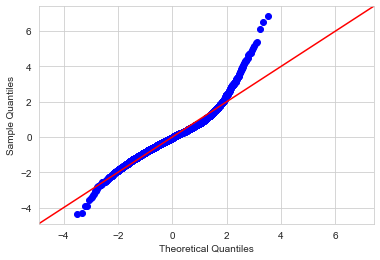

In [83]:
#CHECKING IF RESIDUALS ARE NORMALLY DISTRIBUTED
fig = sm.graphics.qqplot(model_6_test.resid, dist=stats.norm, line='45', fit=True)

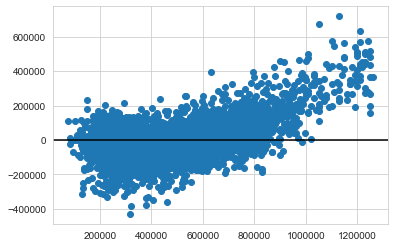

In [84]:
#CHECKING FOR HOMOSCEDACITY
plt.scatter(test_df_6['price'],model_3_test.resid)
plt.axhline(0,color='black')

**ANALYSIS**

By using zip codes instead of sub regions, the R^2 improved drastically from 71.7% to 82.3%. This means that generalizing zip codes into regions did not help the model because there is a high price variation from city to city. The test model confirmed the validity of the model, with both the train and test models varying by 1%.The residuals got worse on the tails, but they still somewhat follow a normal distribution. Removing more outliers does not improve model performance.

# 2 - DOES LOG TRANSFORMING PRICE IMPROVE MODEL?

In [85]:
#DROPPING COLUMNS WITH HIGH CORRELATION AND COLUMNS NOT USED IN MODEL
model4_df = model6_df.copy()
model4_df

price  bedrooms  ...  house_age_when_sold  has_basement
0     221900.00000         3  ...                   59             0
1     538000.00000         3  ...                   63             1
2     180000.00000         2  ...                   82             0
3     604000.00000         4  ...                   49             1
4     510000.00000         3  ...                   28             0
...            ...       ...  ...                  ...           ...
21592 360000.00000         3  ...                    5             0
21593 400000.00000         4  ...                    1             0
21594 402101.00000         2  ...                    5             0
21595 400000.00000         3  ...                   11             0
21596 325000.00000         2  ...                    6             0

[18280 rows x 14 columns]

In [86]:
#HOT ENCODING
dummies = pd.get_dummies(model4_df[categories_2],prefix = categories_2,drop_first = True)
df_preprocessed_4 = model4_df.drop(categories_2,axis = 1)
df_preprocessed_4 = pd.concat([df_preprocessed_4,dummies],axis = 1)
df_preprocessed_4

price  bedrooms  ...  zipcode_98199  waterfront_1
0     221900.00000         3  ...              0             0
1     538000.00000         3  ...              0             0
2     180000.00000         2  ...              0             0
3     604000.00000         4  ...              0             0
4     510000.00000         3  ...              0             0
...            ...       ...  ...            ...           ...
21592 360000.00000         3  ...              0             0
21593 400000.00000         4  ...              0             0
21594 402101.00000         2  ...              0             0
21595 400000.00000         3  ...              0             0
21596 325000.00000         2  ...              0             0

[18280 rows x 82 columns]

In [87]:
#CREATING LOG PRICE COLUMN IN DF
df_preprocessed_4['log_price'] = df_preprocessed_4['price'].map(lambda x :np.log(x))
df_preprocessed_4

price  bedrooms  bathrooms  ...  zipcode_98199  waterfront_1  log_price
0     221900.00000         3          1  ...              0             0   12.30998
1     538000.00000         3          2  ...              0             0   13.19561
2     180000.00000         2          1  ...              0             0   12.10071
3     604000.00000         4          3  ...              0             0   13.31133
4     510000.00000         3          2  ...              0             0   13.14217
...            ...       ...        ...  ...            ...           ...        ...
21592 360000.00000         3          2  ...              0             0   12.79386
21593 400000.00000         4          2  ...              0             0   12.89922
21594 402101.00000         2          1  ...              0             0   12.90446
21595 400000.00000         3          2  ...              0             0   12.89922
21596 325000.00000         2          1  ...              0             0   12.69158

[18280 rows x 83 columns]

In [88]:
#DEFINING TARGET AND PREDICTORS
y = 'log_price'
df_predictors_4 = df_preprocessed_4.drop(['log_price','price'],axis = 1)
X_4 = list(df_predictors_4.columns)

In [89]:
#TEST-TRAIN SPLIT
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(df_preprocessed_4[X_4], df_preprocessed_4[y], test_size=0.25, random_state=69)
print(len(X_train_4), len(X_test_4), len(y_train_4), len(y_test_4))

13710 4570 13710 4570


In [90]:
#COMBINING XTRAIN YTRAIN AND XTEST YTEST
train_df_4 = pd.concat([y_train_4,X_train_4],axis=1)
test_df_4 = pd.concat([y_test_4,X_test_4],axis=1)

In [91]:
#FITTING MODEL
predictors_4 = '+'.join(X_train_4.columns)
formula = y + '~' + predictors_4
model_4 = ols(formula=formula, data=train_df_4).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     846.5
Date:                Sat, 15 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:14:35   Log-Likelihood:                 4144.9
No. Observations:               13710   AIC:                            -8126.
Df Residuals:                   13628   BIC:                            -7509.
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -100.4642      6.645    -15.119      0.000    -113.489     -87.440
bedrooms               -0.0069      0.003     -2.644      0.008      -0.012      -0.002
bathrooms               0.0111      0.003      3.325      0.001       0.005       0.018
sqft_living             0.0003   4.37e-06     63.501      0.000       0.000       0.000
sqft_lot             2.636e-06      2e-07     13.173      0.000    2.24e-06    3.03e-06
floors                 -0.0050      0.004     -1.292      0.196      -0.013       0.003
condition               0.0494      0.003     18.264      0.000       0.044       0.055
grade                   0.1083      0.003     40.863      0.000       0.103       0.113
year_sold               0.0553      0.003     16.771      0.000       0.049       0.062
renovated_post_1990     0.0823      0.011      7.278      0.000       0.060       0.104
house_age_when_sold     0.0008   8.76e-05      8.861      0.000       0.001       0.001
has_basement            0.0457      0.046      0.984      0.325      -0.045       0.137
zipcode_98002          -0.0343      0.019     -1.840      0.066      -0.071       0.002
zipcode_98003           0.0186      0.017      1.093      0.275      -0.015       0.052
zipcode_98004           1.0473      0.020     52.558      0.000       1.008       1.086
zipcode_98005           0.7470      0.022     34.100      0.000       0.704       0.790
zipcode_98006           0.6379      0.016     38.962      0.000       0.606       0.670
zipcode_98007           0.6454      0.022     29.163      0.000       0.602       0.689
zipcode_98008           0.6477      0.017     37.254      0.000       0.614       0.682
zipcode_98010           0.2127      0.028      7.727      0.000       0.159       0.267
zipcode_98011           0.4625      0.019     23.905      0.000       0.425       0.500
zipcode_98014           0.2774      0.028     10.070      0.000       0.223       0.331
zipcode_98019           0.3301      0.020     16.148      0.000       0.290       0.370
zipcode_98022           0.0318      0.019      1.646      0.100      -0.006       0.070
zipcode_98023          -0.0386      0.015     -2.620      0.009      -0.068      -0.010
zipcode_98024           0.3751      0.036     10.494      0.000       0.305       0.445
zipcode_98027           0.5409      0.017     32.693      0.000       0.508       0.573
zipcode_98028           0.4158      0.017     23.965      0.000       0.382       0.450
zipcode_98029           0.6029      0.016     36.679      0.000       0.571       0.635
zipcode_98030           0.0351      0.018      1.987      0.047       0.000       0.070
zipcode_98031           0.0623      0.017      3.616      0.000       0.029       0.096
zipcode_98032          -0.0321      0.023     -1.382      0.167      -0.078       0.013
zip

In [92]:
#REMOVING FEATURES WITH P-VALUE > 0.05
summary_4 = model_4.summary()
p_table_4 = summary_4.tables[1]
p_table_4 = pd.DataFrame(p_table_4.data)
p_table_4.columns = p_table_4.iloc[0]
p_table_4 = p_table_4.drop(0)
p_table_4 = p_table_4.set_index(p_table_4.columns[0])
p_table_4['P>|t|'] = p_table_4['P>|t|'].astype(float)
x_cols_4 = list(p_table_4[p_table_4['P>|t|'] < 0.05].index)
x_cols_4.remove('Intercept')
print(len(p_table_4), len(x_cols_4))

82 74


In [93]:
#FITTING REVISED MODEL
predictors_4 = '+'.join(x_cols_4)
formula = y + '~' + predictors_4
model_4 = ols(formula=formula, data=train_df_4).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     925.7
Date:                Sat, 15 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:14:36   Log-Likelihood:                 4136.6
No. Observations:               13710   AIC:                            -8123.
Df Residuals:                   13635   BIC:                            -7559.
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -100.3924      6.646    -15.105      0.000    -113.420     -87.365
bedrooms               -0.0071      0.003     -2.737      0.006      -0.012      -0.002
bathrooms               0.0111      0.003      3.327      0.001       0.005       0.018
sqft_living             0.0003   4.33e-06     63.915      0.000       0.000       0.000
sqft_lot             2.689e-06   1.99e-07     13.526      0.000     2.3e-06    3.08e-06
condition               0.0494      0.003     18.349      0.000       0.044       0.055
grade                   0.1082      0.003     41.162      0.000       0.103       0.113
year_sold               0.0553      0.003     16.755      0.000       0.049       0.062
renovated_post_1990     0.0820      0.011      7.264      0.000       0.060       0.104
house_age_when_sold     0.0008   8.06e-05     10.104      0.000       0.001       0.001
zipcode_98004           1.0477      0.017     60.126      0.000       1.014       1.082
zipcode_98005           0.7476      0.020     38.020      0.000       0.709       0.786
zipcode_98006           0.6380      0.013     48.285      0.000       0.612       0.664
zipcode_98007           0.6459      0.020     32.446      0.000       0.607       0.685
zipcode_98008           0.6485      0.014     44.888      0.000       0.620       0.677
zipcode_98010           0.2117      0.026      8.195      0.000       0.161       0.262
zipcode_98011           0.4623      0.017     27.510      0.000       0.429       0.495
zipcode_98014           0.2766      0.026     10.686      0.000       0.226       0.327
zipcode_98019           0.3288      0.018     18.197      0.000       0.293       0.364
zipcode_98023          -0.0380      0.011     -3.405      0.001      -0.060      -0.016
zipcode_98024           0.3740      0.034     10.856      0.000       0.306       0.442
zipcode_98027           0.5397      0.013     40.070      0.000       0.513       0.566
zipcode_98028           0.4156      0.014     28.740      0.000       0.387       0.444
zipcode_98029           0.6014      0.013     45.257      0.000       0.575       0.627
zipcode_98030           0.0352      0.015      2.377      0.017       0.006       0.064
zipcode_98031           0.0623      0.014      4.351      0.000       0.034       0.090
zipcode_98033           0.7606      0.013     60.116      0.000       0.736       0.785
zipcode_98034           0.5310      0.011     48.685      0.000       0.510       0.552
zipcode_98038           0.1684      0.011     15.377      0.000       0.147       0.190
zipcode_98039           1.2476      0.074     16.970      0.000       1.104       1.392
zipcode_98040           0.8588      0.019     45.141      0.000       0.822       0.896
zipcode_98042           0.0487      0.011      4.510      0.000       0.028       0.070
zip

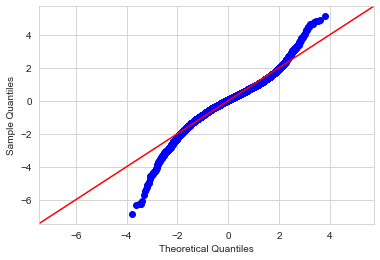

In [94]:
#CHECKING IF RESIDUALS ARE NORMALLY DISTRIBUTED
fig = sm.graphics.qqplot(model_4.resid, dist=stats.norm, line='45', fit=True)

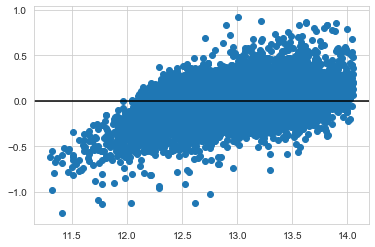

In [95]:
#CHECKING FOR HOMOSCEDACITY
plt.scatter(train_df_4['log_price'],model_4.resid)
plt.axhline(0,color='black')

**ANALYSIS**

By log transforming the target value (Price), the interpretability of the model decreased drastically without adding too much benefit. The R^2 only increased around 1%. The best model is still Model6, which uses the zip codes instead of sub regions. Did not do test model because did not see the benefit of doing so.

# 3 - MOST/LEAST IMPORTANT FEATURES

I'll be running Model 6 (zipcode model) and will be standardizing the data to determine the most important features.
On previous models, we saw how each feature affected price, meaning by increasing 1 unit of that feature, it would impact the price by x number of dollars, which was determined by the coefficients. Now by standadizing the data, we will be able to see the 'weight' of each feature.

In [96]:
#DROPPING COLUMNS NOT BEING USED IN MODEL
model6_df = df.drop(['lat','long','Sub_Region','date'],axis = 1)

#DROPPING COLUMNS WITH HIGH CORRELATION
model6_df = model6_df.drop(['sqft_above','yr_renovated','yr_built','sqft_lot15',
                            'sqft_living15'],axis = 1)

#STARDADIZING DATA EXCEPT TARGET (PRICE) AND CATEGORICAL COLUMNS
for col in model6_df.drop(['zipcode','waterfront','price'],axis=1).columns:
    model6_df[col] = stats.zscore(model6_df[col])
    
model6_df

price  bedrooms  ...  house_age_when_sold  has_basement
0     221900.00000  -0.34165  ...              0.50835      -0.03626
1     538000.00000  -0.34165  ...              0.64417      27.58019
2     180000.00000  -1.64442  ...              1.28935      -0.03626
3     604000.00000   0.96111  ...              0.16878      27.58019
4     510000.00000  -0.34165  ...             -0.54430      -0.03626
...            ...       ...  ...                  ...           ...
21592 360000.00000  -0.34165  ...             -1.32530      -0.03626
21593 400000.00000   0.96111  ...             -1.46112      -0.03626
21594 402101.00000  -1.64442  ...             -1.32530      -0.03626
21595 400000.00000  -0.34165  ...             -1.12156      -0.03626
21596 325000.00000  -1.64442  ...             -1.29134      -0.03626

[18280 rows x 14 columns]

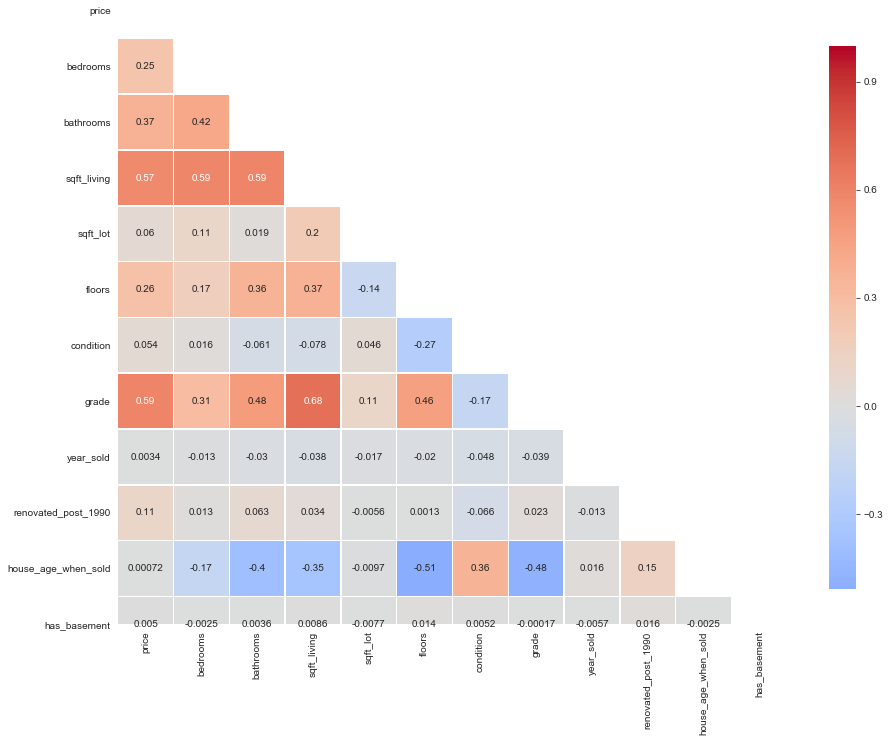

In [97]:
#CORRELATION HEATMAP
corr = model6_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 20))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5});

In [98]:
# #TURNING COLUMNS TO STRING FOR HOT ENCODING
categories_2 = ['zipcode','waterfront']

#HOT ENCODING
dummies = pd.get_dummies(model6_df[categories_2],prefix = categories_2,drop_first = True)
df_preprocessed_6 = model6_df.drop(categories_2,axis = 1)
df_preprocessed_6 = pd.concat([df_preprocessed_6,dummies],axis = 1)
df_preprocessed_6

price  bedrooms  ...  zipcode_98199  waterfront_1
0     221900.00000  -0.34165  ...              0             0
1     538000.00000  -0.34165  ...              0             0
2     180000.00000  -1.64442  ...              0             0
3     604000.00000   0.96111  ...              0             0
4     510000.00000  -0.34165  ...              0             0
...            ...       ...  ...            ...           ...
21592 360000.00000  -0.34165  ...              0             0
21593 400000.00000   0.96111  ...              0             0
21594 402101.00000  -1.64442  ...              0             0
21595 400000.00000  -0.34165  ...              0             0
21596 325000.00000  -1.64442  ...              0             0

[18280 rows x 82 columns]

In [99]:
#DEFINING TARGET AND PREDICTORS
y = 'price'
df_predictors_6 = df_preprocessed_6.drop('price',axis = 1)
X_6 = list(df_predictors_6.columns)

In [100]:
#TRAIN-TEST SPLIT
X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(df_preprocessed_6[X_6], df_preprocessed_6[y], test_size=0.25, random_state=69)
print(len(X_train_6), len(X_test_6), len(y_train_6), len(y_test_6))

13710 4570 13710 4570


In [101]:
#COMBINING XTRAIN YTRAIN AND XTEST YTEST
train_df_6 = pd.concat([y_train_6,X_train_6],axis=1)
test_df_6 = pd.concat([y_test_6,X_test_6],axis=1)

In [102]:
#FITTING MODEL
predictors_6 = '+'.join(X_train_6.columns)
formula = y + '~' + predictors_6
model_6 = ols(formula=formula, data=train_df_6).fit()
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     728.7
Date:                Sat, 15 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:14:39   Log-Likelihood:            -1.7561e+05
No. Observations:               13710   AIC:                         3.514e+05
Df Residuals:                   13628   BIC:                         3.520e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2.959e+05   5548.033     53.343      0.000    2.85e+05    3.07e+05
bedrooms            -6135.5438    984.388     -6.233      0.000   -8065.081   -4206.007
bathrooms            2551.8493   1026.132      2.487      0.013     540.489    4563.209
sqft_living          8.493e+04   1380.097     61.538      0.000    8.22e+04    8.76e+04
sqft_lot             1.026e+04    912.661     11.246      0.000    8475.238    1.21e+04
floors                735.5506   1039.939      0.707      0.479   -1302.873    2773.975
condition            1.386e+04    863.301     16.056      0.000    1.22e+04    1.56e+04
grade                5.357e+04   1256.082     42.648      0.000    5.11e+04     5.6e+04
year_sold            1.178e+04    763.002     15.444      0.000    1.03e+04    1.33e+04
renovated_post_1990  7235.6468    785.319      9.214      0.000    5696.314    8774.980
house_age_when_sold  2.101e+04   1275.304     16.474      0.000    1.85e+04    2.35e+04
has_basement          994.9470    831.956      1.196      0.232    -635.802    2625.696
zipcode_98002        8134.5146   9216.070      0.883      0.377   -9930.256    2.62e+04
zipcode_98003       -3377.6492   8439.820     -0.400      0.689   -1.99e+04    1.32e+04
zipcode_98004        5.123e+05   9854.760     51.982      0.000    4.93e+05    5.32e+05
zipcode_98005        3.323e+05   1.08e+04     30.671      0.000    3.11e+05    3.54e+05
zipcode_98006        2.663e+05   8097.513     32.885      0.000     2.5e+05    2.82e+05
zipcode_98007        2.519e+05   1.09e+04     23.018      0.000     2.3e+05    2.73e+05
zipcode_98008        2.384e+05   8598.935     27.721      0.000    2.22e+05    2.55e+05
zipcode_98010        8.066e+04   1.36e+04      5.926      0.000     5.4e+04    1.07e+05
zipcode_98011        1.472e+05   9568.839     15.385      0.000    1.28e+05    1.66e+05
zipcode_98014        9.398e+04   1.36e+04      6.898      0.000    6.73e+04    1.21e+05
zipcode_98019        9.584e+04   1.01e+04      9.480      0.000     7.6e+04    1.16e+05
zipcode_98022        8729.1724   9561.066      0.913      0.361      -1e+04    2.75e+04
zipcode_98023       -2.024e+04   7291.380     -2.776      0.006   -3.45e+04   -5946.170
zipcode_98024        1.232e+05   1.77e+04      6.968      0.000    8.85e+04    1.58e+05
zipcode_98027        2.009e+05   8182.256     24.549      0.000    1.85e+05    2.17e+05
zipcode_98028        1.322e+05   8580.510     15.411      0.000    1.15e+05    1.49e+05
zipcode_98029        2.233e+05   8129.919     27.461      0.000    2.07e+05    2.39e+05
zipcode_98030       -1905.2451   8727.498     -0.218      0.827    -1.9e+04    1.52e+04
zipcode_98031        6962.3085   8524.634      0.817      0.414   -9747.151    2.37e+04
zipcode_98032         918.9356   1.15e+04      0.080      0.936   -2.16e+04    2.34e+04
zip

In [103]:
#REMOVING FEATURES WITH P-VALUE > 0.05
summary_6 = model_6.summary()
p_table_6 = summary_6.tables[1]
p_table_6 = pd.DataFrame(p_table_6.data)
p_table_6.columns = p_table_6.iloc[0]
p_table_6 = p_table_6.drop(0)
p_table_6 = p_table_6.set_index(p_table_6.columns[0])
p_table_6['P>|t|'] = p_table_6['P>|t|'].astype(float)
x_cols_6 = list(p_table_6[p_table_6['P>|t|'] < 0.05].index)
x_cols_6.remove('Intercept')
print(len(p_table_6), len(x_cols_6))

82 72


In [104]:
#FTTING REVISED MODEL
predictors_6 = '+'.join(x_cols_6)
formula = y + '~' + predictors_6
model_6 = ols(formula=formula, data=train_df_6).fit()
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     819.9
Date:                Sat, 15 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:14:39   Log-Likelihood:            -1.7562e+05
No. Observations:               13710   AIC:                         3.514e+05
Df Residuals:                   13637   BIC:                         3.519e+05
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2.992e+05   2339.705    127.891      0.000    2.95e+05    3.04e+05
bedrooms            -6122.9067    983.727     -6.224      0.000   -8051.147   -4194.666
bathrooms            2538.0683   1025.483      2.475      0.013     527.979    4548.157
sqft_living           8.51e+04   1366.619     62.269      0.000    8.24e+04    8.78e+04
sqft_lot              1.02e+04    905.782     11.264      0.000    8427.380     1.2e+04
condition            1.394e+04    858.765     16.234      0.000    1.23e+04    1.56e+04
grade                5.355e+04   1245.879     42.979      0.000    5.11e+04     5.6e+04
year_sold            1.179e+04    762.749     15.463      0.000    1.03e+04    1.33e+04
renovated_post_1990  7312.4549    784.077      9.326      0.000    5775.556    8849.354
house_age_when_sold  2.053e+04   1171.628     17.521      0.000    1.82e+04    2.28e+04
zipcode_98004         5.09e+05   8469.782     60.097      0.000    4.92e+05    5.26e+05
zipcode_98005        3.285e+05   9594.782     34.242      0.000     3.1e+05    3.47e+05
zipcode_98006        2.627e+05   6336.902     41.454      0.000     2.5e+05    2.75e+05
zipcode_98007        2.487e+05   9712.995     25.608      0.000     2.3e+05    2.68e+05
zipcode_98008        2.347e+05   6962.539     33.703      0.000    2.21e+05    2.48e+05
zipcode_98010        7.725e+04   1.27e+04      6.097      0.000    5.24e+04    1.02e+05
zipcode_98011        1.437e+05   8151.533     17.633      0.000    1.28e+05     1.6e+05
zipcode_98014        9.054e+04   1.27e+04      7.131      0.000    6.57e+04    1.15e+05
zipcode_98019        9.254e+04   8783.641     10.535      0.000    7.53e+04     1.1e+05
zipcode_98023       -2.384e+04   5278.619     -4.516      0.000   -3.42e+04   -1.35e+04
zipcode_98024          1.2e+05    1.7e+04      7.075      0.000    8.67e+04    1.53e+05
zipcode_98027        1.976e+05   6464.363     30.564      0.000    1.85e+05     2.1e+05
zipcode_98028        1.287e+05   6967.894     18.475      0.000    1.15e+05    1.42e+05
zipcode_98029        2.201e+05   6368.817     34.561      0.000    2.08e+05    2.33e+05
zipcode_98033        3.247e+05   6046.072     53.701      0.000    3.13e+05    3.37e+05
zipcode_98034        1.839e+05   5147.176     35.720      0.000    1.74e+05    1.94e+05
zipcode_98038        3.769e+04   5159.769      7.305      0.000    2.76e+04    4.78e+04
zipcode_98039        6.508e+05   3.63e+04     17.924      0.000     5.8e+05    7.22e+05
zipcode_98040         4.33e+05   9272.867     46.692      0.000    4.15e+05    4.51e+05
zipcode_98045        9.864e+04   7611.349     12.960      0.000    8.37e+04    1.14e+05
zipcode_98052        2.454e+05   5077.785     48.322      0.000    2.35e+05    2.55e+05
zipcode_98053         2.41e+05   6401.721     37.650      0.000    2.28e+05    2.54e+05
zip

In [105]:
#GETTING MODEL COEF
model_6.params.sort_values()

zipcode_98092         -25560.54006
zipcode_98023         -23840.41820
bedrooms               -6122.90673
bathrooms               2538.06828
renovated_post_1990     7312.45491
                          ...     
zipcode_98109         414962.28927
zipcode_98040         432971.21730
zipcode_98112         435989.64292
zipcode_98004         509011.20458
zipcode_98039         650823.89140
Length: 73, dtype: float64

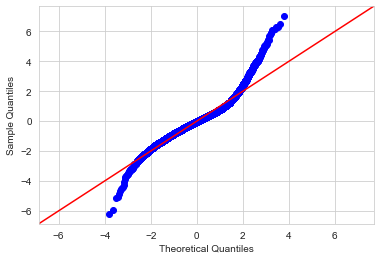

In [106]:
#CHECKING IF RESIDUALS ARE NORMALLY DISTRIBUTED
fig = sm.graphics.qqplot(model_6.resid, dist=stats.norm, line='45', fit=True)

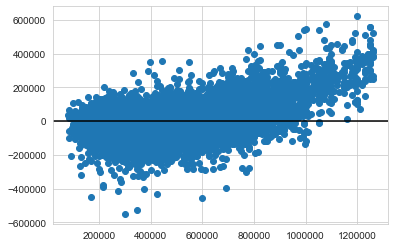

In [107]:
#CHECKING FOR HOMOSCEDACITY
plt.scatter(train_df_6['price'],model_6.resid)
plt.axhline(0,color='black')

In [108]:
#FITTING MODEL WITH TEST DATA
predictors_6 = '+'.join(X_train_6.columns)
formula = y + '~' + predictors_6
model_6_test = ols(formula=formula, data=test_df_6).fit()
model_6_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     258.7
Date:                Sat, 15 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:14:41   Log-Likelihood:                -58517.
No. Observations:                4570   AIC:                         1.172e+05
Df Residuals:                    4488   BIC:                         1.177e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2.898e+05   9974.192     29.055      0.000     2.7e+05    3.09e+05
bedrooms            -3759.3143   1709.495     -2.199      0.028   -7110.767    -407.862
bathrooms            4852.5344   1778.278      2.729      0.006    1366.234    8338.835
sqft_living          8.565e+04   2377.384     36.025      0.000     8.1e+04    9.03e+04
sqft_lot             8122.8599   1520.734      5.341      0.000    5141.471    1.11e+04
floors              -1361.5845   1855.122     -0.734      0.463   -4998.537    2275.368
condition            1.465e+04   1512.399      9.684      0.000    1.17e+04    1.76e+04
grade                5.046e+04   2116.437     23.841      0.000    4.63e+04    5.46e+04
year_sold            1.052e+04   1332.460      7.894      0.000    7906.732    1.31e+04
renovated_post_1990  7723.5726   1391.788      5.549      0.000    4994.982    1.05e+04
house_age_when_sold  1.566e+04   2247.090      6.968      0.000    1.13e+04    2.01e+04
has_basement         -858.4040   1087.711     -0.789      0.430   -2990.854    1274.046
zipcode_98002        1.523e+04   1.73e+04      0.882      0.378   -1.86e+04    4.91e+04
zipcode_98003       -3088.8971   1.46e+04     -0.212      0.833   -3.17e+04    2.55e+04
zipcode_98004        6.129e+05   1.79e+04     34.221      0.000    5.78e+05    6.48e+05
zipcode_98005        3.205e+05   1.85e+04     17.329      0.000    2.84e+05    3.57e+05
zipcode_98006        2.759e+05   1.38e+04     19.964      0.000    2.49e+05    3.03e+05
zipcode_98007         2.54e+05   1.91e+04     13.296      0.000    2.17e+05    2.91e+05
zipcode_98008        2.333e+05   1.59e+04     14.685      0.000    2.02e+05    2.64e+05
zipcode_98010        7.536e+04   2.32e+04      3.243      0.001    2.98e+04    1.21e+05
zipcode_98011        1.429e+05    1.7e+04      8.426      0.000     1.1e+05    1.76e+05
zipcode_98014        1.116e+05   2.18e+04      5.115      0.000    6.88e+04    1.54e+05
zipcode_98019        1.109e+05   1.71e+04      6.497      0.000    7.74e+04    1.44e+05
zipcode_98022        6621.8389   1.77e+04      0.374      0.709   -2.81e+04    4.14e+04
zipcode_98023       -2.006e+04   1.29e+04     -1.556      0.120   -4.53e+04    5216.068
zipcode_98024        1.648e+05   3.13e+04      5.264      0.000    1.03e+05    2.26e+05
zipcode_98027        1.994e+05   1.48e+04     13.517      0.000     1.7e+05    2.28e+05
zipcode_98028         1.34e+05   1.44e+04      9.320      0.000    1.06e+05    1.62e+05
zipcode_98029        2.315e+05    1.5e+04     15.427      0.000    2.02e+05    2.61e+05
zipcode_98030        1.916e+04   1.45e+04      1.320      0.187   -9305.100    4.76e+04
zipcode_98031        2.121e+04   1.44e+04      1.477      0.140   -6944.232    4.94e+04
zipcode_98032       -1.098e+04    1.8e+04     -0.609      0.542   -4.63e+04    2.43e+04
zip

In [109]:
#REMOVING FEATURES WITH P-VALUE > 0.05
summary_6_test = model_6_test.summary()
p_table_6_test = summary_6_test.tables[1]
p_table_6_test = pd.DataFrame(p_table_6_test.data)
p_table_6_test.columns = p_table_6_test.iloc[0]
p_table_6_test = p_table_6_test.drop(0)
p_table_6_test = p_table_6_test.set_index(p_table_6_test.columns[0])
p_table_6_test['P>|t|'] = p_table_6_test['P>|t|'].astype(float)
x_cols_6_test = list(p_table_6_test[p_table_6_test['P>|t|'] < 0.05].index)
x_cols_6_test.remove('Intercept')
print(len(p_table_6_test), len(x_cols_6_test))

82 69


In [110]:
#FITTING REVISED TEST MODEL
predictors_6_test = '+'.join(x_cols_6_test)
formula = y + '~' + predictors_6_test
model_6_test = ols(formula=formula, data=test_df_6).fit()
model_6_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     302.0
Date:                Sat, 15 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:14:41   Log-Likelihood:                -58532.
No. Observations:                4570   AIC:                         1.172e+05
Df Residuals:                    4500   BIC:                         1.177e+05
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             2.92e+05   3388.276     86.175      0.000    2.85e+05    2.99e+05
bedrooms            -3702.8498   1709.862     -2.166      0.030   -7055.019    -350.681
bathrooms            5010.4852   1776.119      2.821      0.005    1528.420    8492.551
sqft_living          8.515e+04   2350.144     36.230      0.000    8.05e+04    8.98e+04
sqft_lot             8421.4701   1503.144      5.603      0.000    5474.570    1.14e+04
condition            1.495e+04   1501.104      9.957      0.000     1.2e+04    1.79e+04
grade                4.972e+04   2102.033     23.652      0.000    4.56e+04    5.38e+04
year_sold            1.055e+04   1332.318      7.918      0.000    7937.304    1.32e+04
renovated_post_1990  7596.4915   1390.475      5.463      0.000    4870.477    1.03e+04
house_age_when_sold  1.608e+04   2073.769      7.754      0.000     1.2e+04    2.01e+04
zipcode_98004        6.113e+05   1.53e+04     40.030      0.000    5.81e+05    6.41e+05
zipcode_98005         3.19e+05    1.6e+04     19.986      0.000    2.88e+05     3.5e+05
zipcode_98006        2.746e+05   1.01e+04     27.101      0.000    2.55e+05    2.94e+05
zipcode_98007        2.523e+05   1.67e+04     15.147      0.000     2.2e+05    2.85e+05
zipcode_98008        2.313e+05   1.28e+04     18.041      0.000    2.06e+05    2.56e+05
zipcode_98010        7.236e+04   2.13e+04      3.393      0.001    3.05e+04    1.14e+05
zipcode_98011        1.414e+05   1.42e+04      9.980      0.000    1.14e+05    1.69e+05
zipcode_98014         1.09e+05   1.98e+04      5.514      0.000    7.02e+04    1.48e+05
zipcode_98019        1.079e+05   1.43e+04      7.529      0.000    7.98e+04    1.36e+05
zipcode_98024        1.623e+05      3e+04      5.417      0.000    1.04e+05    2.21e+05
zipcode_98027        1.973e+05   1.14e+04     17.271      0.000    1.75e+05     2.2e+05
zipcode_98028        1.323e+05   1.09e+04     12.090      0.000    1.11e+05    1.54e+05
zipcode_98029        2.295e+05   1.17e+04     19.586      0.000    2.07e+05    2.52e+05
zipcode_98033         3.21e+05   1.03e+04     31.216      0.000    3.01e+05    3.41e+05
zipcode_98034        1.919e+05   8767.018     21.894      0.000    1.75e+05    2.09e+05
zipcode_98038        3.752e+04   8288.867      4.527      0.000    2.13e+04    5.38e+04
zipcode_98039         7.02e+05   5.16e+04     13.596      0.000    6.01e+05    8.03e+05
zipcode_98040        4.447e+05    1.3e+04     34.272      0.000    4.19e+05     4.7e+05
zipcode_98045        1.125e+05   1.57e+04      7.178      0.000    8.17e+04    1.43e+05
zipcode_98052        2.536e+05   9119.483     27.813      0.000    2.36e+05    2.72e+05
zipcode_98053        2.333e+05   1.25e+04     18.656      0.000    2.09e+05    2.58e+05
zipcode_98055        4.532e+04   1.15e+04      3.953      0.000    2.28e+04    6.78e+04
zip

In [111]:
#GETTING REVISED MODEL COEF
model_6_test.params.sort_values()

bedrooms               -3702.84978
bathrooms               5010.48515
renovated_post_1990     7596.49152
sqft_lot                8421.47006
year_sold              10549.30126
                          ...     
zipcode_98119         427928.94003
zipcode_98112         434465.38884
zipcode_98040         444708.69588
zipcode_98004         611316.41782
zipcode_98039         701958.48821
Length: 70, dtype: float64

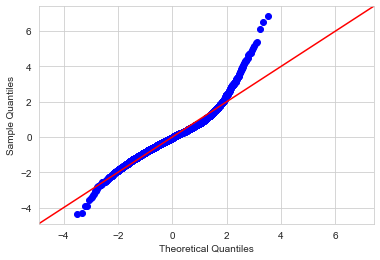

In [112]:
#CHECKING IF RESIDUALS ARE NORMALLY DISTRIBUTED
fig = sm.graphics.qqplot(model_6_test.resid, dist=stats.norm, line='45', fit=True)

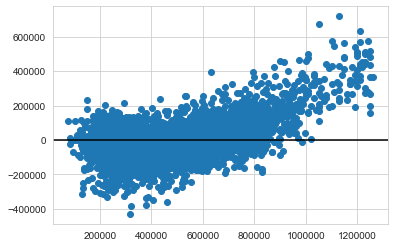

In [113]:
#CHECKING FOR HOMOSCEDACITY
plt.scatter(test_df_6['price'],model_3_test.resid)
plt.axhline(0,color='black')

In [114]:
#CREATING DF FOR MODEL 6 (ZIPCODE MODEL) COEFS
param_df = pd.DataFrame(model_6_test.params)
param_df.reset_index(inplace=True)
param_df.rename(columns={'index':'features',0:'coef'},inplace=True)

#DROPPING COLUMNS THAT CONTAIN ZIPCODES BECAUSE THEY ARE SO MANY AND THEY AREN'T TOO RELEVANT
#TO SUGGEST CHANGES TO A HOUSE
param_df[~param_df['features'].str.contains('zipcode')].sort_values(by='coef')

features         coef
1              bedrooms  -3702.84978
2             bathrooms   5010.48515
8   renovated_post_1990   7596.49152
4              sqft_lot   8421.47006
7             year_sold  10549.30126
5             condition  14946.28343
9   house_age_when_sold  16080.50247
6                 grade  49717.88259
3           sqft_living  85145.06433
69         waterfront_1 188904.31403
0             Intercept 291984.65956

**ANALYSIS**

Some of the most important features in a house are being located near the waterfront, sqft living, grade, and age of the house when sold.

Some of the least important features are number of bedrooms and bathrooms, lot size, and if the house was renovated or not.

# CONCLUSIONS & RECOMMENDATIONS

**Question 1**

   > By using zip codes instead of sub_regions, model performance increased drastically. That may be due to the sub region category being too broad; there may be a big price variation between zip codes within a region. Next step would be to plot house prices on a map to see how location affects the market.
    
**Question 2**

   > Log transforming did improve the model by 1%, but the extra complexity does not justify the increase. Log transformation adds some complexity to the regression model when it comes to interpreting the model's coefficients. With the target variable being log transformed, when the features change by a fixed percentage, the target will also change by a fixed percentage. A change in the features will not be equal to a fixed dollar amount.
    Due to this increased complexity, the regular model was chosen.
    
 **Question 3 and Recommendations**
 
   There are certain things that can be done and certain things that should be avoided when investing into a house. 
     
   These are some recommendations if a homeowner wants to increase the value of his house:
   1.  Increase the living square footage of the house. Living square footage is worth more than lot square footage.
   2.  Improve the overall grade of the house. If the house is being renovated, invest in high quality materials and luxurious items. Hire an architect to create a custom design.
         
   Based on the regression model's output, the following things are not recommended when the goal is to increase a house's value:
   1. Adding a new bedroom or bathroom to a house does not guarantee that the house's value will increase. Does not take space from the kitchen or living room in order to make a new bedroom/bathroom. Only add them if the house is being expanded.
   2. Renovating a house might not increase it's value. If you plan to renovate, increase the total living square footage and investing in high quality materials.
   3. Don't go crazy and buy a portion of your neighbor's backyard to increase your lot size. The only way that it will help you is if the lot you buy has a waterfront view.
        
         
